<p style="text-align:center">
    <img src="https://logos-download.com/wp-content/uploads/2017/11/FIFA_logo.png" width="200" alt="FIFA LOGO"  />
    </a>
</p>

The FIFA division had <code>a new director</code>  who didn't know much about the company and needed data analysts to share <code>historical data</code> and <code>recent product updates</code> with the director.

In this exloratory data analysis we will convert F15 outcomes into Training Labels with `1` means the buying F15; label `0` means it was not purchasing F15.

Use the data we already have to <code>build models</code> that predict F16s and the rate at which <code>users will buy F16</code>. Finally, label who will buy F16 (`1` ,`0`) 

## Objectives

Perform exploratory  Data Analysis and determine Training Labels

*   Exploratory Data Analysis
*   Determine Training Labels


## Table of Contents 

1. Data Definitions 
2. Load Libraries 
3. Load Data 
4. Understand Nature of the Data 
5. Data Visualization 
6. Analyzing F15 to F09 Separately 
7. Time Series Analysis 
8. Different Type of Players 
9. Feature Selection 
10. Train/Test Dataset Splitting 
11. Modeling 
12. Compare Models and Algorithms 
13. Predict F16 using F15’s model 


<h2>Data Definitions</h2>

|     column   |                                      description                                   |
| ------------ | :-------------------------------------------------------------------------------:  |
| run_on       |                                     `data as of`                                   |
| postal_code  |                            `postal code of user location`                          |
| day_cnt      | `number of uniqe days active in FIFA franchise in past 365 days as of run_on date` |
| all_cnt      |                            `number of EA titles owned`                             |
| fifa_cnt     |                          `number of FIFA titles owned`                             |
|  F15         |                         date for FIFA 15 purchase (if any)                         |
|  F14         |                         date for FIFA 14 purchase (if any)                         |
|  F13         |                         date for FIFA 13 purchase (if any)                         |
|  F12         |                         date for FIFA 12 purchase (if any)                         |
|  F11         |                         date for FIFA 11 purchase (if any)                         |
|  F10         |                         date for FIFA 10 purchase (if any)                         |
|  F09         |                         date for FIFA 09 purchase (if any)                         |
|  PS3         |                             binary for PS3 ownership                               |
|  PS4         |                             binary for PS4 ownership                               |
|  X360        |                             binary for X360 ownership                              |
|  XONE        |                             binary for XBOX ONE ownership                          |
|  PC          |                             binary for PC ownership                                | 

***

## LOAD LIBRARIES 

In [349]:
#Basic 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time #Timestamp, time tuple, formatted time
import datetime # dealing w/ date, time 
from datetime import datetime,timedelta# date specific processing 
import os # interacting w/ the operatting system.OS
import matplotlib #illustrate
import matplotlib.pyplot as plt #Making Chart
import matplotlib as mpl
import matplotlib.ticker as mticker
import seaborn as sns #Data Visualization 
import copy #deep copy
from IPython.display import Image # import image module


#Common Tools 
from sklearn import preprocessing # change raw feature vectors more suitable 
from sklearn.preprocessing import OneHotEncoder#encode categorical features 
from sklearn.preprocessing import LabelEncoder# to normalize labels & to transform non-numerical labels 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scale = StandardScaler()
from sklearn import datasets #embeds some small toy datasets as introduced in the Getting Started section
from collections import Counter
import sklearn.preprocessing as preprocessing 

#Algorithms 
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, gaussian_process, neural_network #Integration Method(Random forest and gbdt method)
from sklearn.model_selection import train_test_split #Partition Data Set 
from sklearn.compose import make_column_transformer #Fit all transformers, transform the data and concatenate results
from sklearn.pipeline import make_pipeline #Construct a Pipeline from the given estimators
from sklearn.base import BaseEstimator #Base class for all estimators in scikit-learn
from sklearn.base import ClassifierMixin #Hybrid Classifier

#Model 
from sklearn import linear_model # a linear regression model
from sklearn.linear_model import LogisticRegression #Logistic Regression 
from sklearn.datasets import load_breast_cancer #Discriminant two-class data set (Standard) 
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score #doing Cros_validation
from sklearn.model_selection import StratifiedKFold, GridSearchCV #Hierarchical Cross Segmentation / Grid Search and Cross Validation (RandomForest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB# Gaussian Naive Bayes
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.ensemble import BaggingClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

#Metrics
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,balanced_accuracy_score  #Display the main classification indicators, return the accuracy, recall, F1 score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, auc, roc_curve  #Model evaluation: calculate auc based on the real value, predicted value(must be 0/1 or proba value)
from sklearn.metrics import mean_squared_error #Mean square error
from sklearn.metrics import explained_variance_score #explain the variance regression scoring function 
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_absolute_error, f1_score #Accuracy/Calculate F1 score, AUC, ROC Curve 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score


#Cofigure Defaults 
import warnings #Can generate warning messages 
warnings.simplefilter(action='ignore') #Function control output 

#Adjust Font, color, background,floating point 
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14) #Set Font Size 
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #Font 
matplotlib.rcParams['axes.unicode_minus']=False #Whether the negative sign of the X or y axis scale can be displayed
np.set_printoptions(suppress=True) #Set floating point precision 
pd.set_option('display.float_format', lambda x: '%.4f' % x) #Scientific Notation 
%matplotlib inline

In [2]:
conda install GraphViz

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.07.19 |       hecd8cb5_0         124 KB
    ------------------------------------------------------------
                                           Total:         124 KB

The following packages will be UPDATED:

  ca-certificates                      2022.4.26-hecd8cb5_0 --> 2022.07.19-hecd8cb5_0



ca-certificates-2022 | 124 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c https://conda.binstar.org/sstromberg pydot


UnavailableInvalidChannel: HTTP 404 NOT FOUND for channel sstromberg <https://conda.binstar.org/sstromberg>

The channel is not accessible or is invalid.

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.



Note: you may need to restart the kernel to use updated packages.


## Load Data 

In [4]:
filename = "/Users/elaineliu/Library/Mobile Documents/com~apple~CloudDocs/Nick_Projects/First_Project/Modeling/FIFA/data_stack.csv"
raw_data = pd.read_csv(filename) # Loading the original dateset 

In [5]:
raw_data.head()

,run_on,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,X360,XONE,PC
0,7/3/2015,17257,8.0000,6.0000,1.0000,12/15/2014,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0000,0.0000,0.0000,0.0000
1,7/3/2015,60045,0.0000,2.0000,1.0000,NaN,NaN,2/26/2013,NaN,NaN,NaN,NaN,0,0.0000,0.0000,0.0000,0.0000
2,7/3/2015,89146,0.0000,4.0000,1.0000,NaN,NaN,NaN,2/10/2012,NaN,NaN,NaN,1,0.0000,0.0000,0.0000,0.0000
3,7/3/2015,55104,62.0000,12.0000,2.0000,NaN,1/30/2014,NaN,12/15/2011,NaN,NaN,NaN,0,0.0000,0.0000,0.0000,0.0000
4,7/3/2015,75126,0.0000,5.0000,2.0000,NaN,NaN,1/25/2013,11/28/2011,NaN,NaN,NaN,1,1.0000,0.0000,0.0000,0.0000


In [6]:
raw_data.shape #The shape of the raw data

(700000, 17)

In [7]:
print(raw_data.columns)

Index(['run_on', 'postal_code', 'day_cnt', 'all_cnt', 'fifa_cnt', 'F15', 'F14',
       'F13', 'F12', 'F11', 'F10', 'F09', 'PS3', 'PS4', 'X360', 'XONE', 'PC'],
      dtype='object')


## Understand Nature of the Data 

In [8]:
raw_data.info() #quick look at our original data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   run_on       700000 non-null  object 
 1   postal_code  699998 non-null  object 
 2   day_cnt      699998 non-null  float64
 3   all_cnt      699998 non-null  float64
 4   fifa_cnt     699998 non-null  float64
 5   F15          257429 non-null  object 
 6   F14          268944 non-null  object 
 7   F13          259488 non-null  object 
 8   F12          214588 non-null  object 
 9   F11          132406 non-null  object 
 10  F10          106454 non-null  object 
 11  F09          52297 non-null   object 
 12  PS3          699998 non-null  object 
 13  PS4          699998 non-null  float64
 14  X360         699998 non-null  float64
 15  XONE         699998 non-null  float64
 16  PC           699998 non-null  float64
dtypes: float64(7), object(10)
memory usage: 90.8+ MB


In [9]:
raw_data.head() #View the first 5 rows

,run_on,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,X360,XONE,PC
0,7/3/2015,17257,8.0000,6.0000,1.0000,12/15/2014,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0000,0.0000,0.0000,0.0000
1,7/3/2015,60045,0.0000,2.0000,1.0000,NaN,NaN,2/26/2013,NaN,NaN,NaN,NaN,0,0.0000,0.0000,0.0000,0.0000
2,7/3/2015,89146,0.0000,4.0000,1.0000,NaN,NaN,NaN,2/10/2012,NaN,NaN,NaN,1,0.0000,0.0000,0.0000,0.0000
3,7/3/2015,55104,62.0000,12.0000,2.0000,NaN,1/30/2014,NaN,12/15/2011,NaN,NaN,NaN,0,0.0000,0.0000,0.0000,0.0000
4,7/3/2015,75126,0.0000,5.0000,2.0000,NaN,NaN,1/25/2013,11/28/2011,NaN,NaN,NaN,1,1.0000,0.0000,0.0000,0.0000


In [10]:
raw_data.describe(include="all") #describe all the columns in "raw_data" 

,run_on,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,X360,XONE,PC
count,700000,699998.0000,699998.0000,699998.0000,699998.0000,257429,268944,259488,214588,132406,106454,52297,699998.0000,699998.0000,699998.0000,699998.0000,699998.0000
unique,2,28019.0000,nan,nan,nan,294,655,1029,1383,858,902,898,5.0000,nan,nan,nan,nan
top,7/3/2015,92867.0000,nan,nan,nan,9/23/2014,9/24/2013,9/25/2012,9/27/2011,9/28/2010,10/20/2009,10/16/2008,0.0000,nan,nan,nan,nan
freq,699998,2220.0000,nan,nan,nan,18026,10858,15196,7942,4702,3168,1232,354839.0000,nan,nan,nan,nan
mean,NaN,nan,25.5237,8.0500,1.9021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.1807,0.0000,0.0000,0.0967
std,NaN,nan,48.8920,7.0032,1.3386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.3848,0.0000,0.0000,0.2955
min,NaN,nan,0.0000,0.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0000,0.0000,0.0000,0.0000
25%,NaN,nan,0.0000,3.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0000,0.0000,0.0000,0.0000
50%,NaN,nan,2.0000,6.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0000,0.0000,0.0000,0.0000
75%,NaN,nan,26.0000,11.0000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0000,0.0000,0.0000,0.0000


## Data Processing

In [11]:
#Dealing with Missing & Empty Values & '?'/'fl' value 

#according to descrbe, 'X360' and 'XONE'show 0, so we delete two axis
raw_data=raw_data.drop(labels = ['X360','XONE'], axis=1)

#change the value of '?' in PS3 to a 0 vlaue 
raw_data['PS3'] = raw_data['PS3'].apply(lambda x: 0 if x == '?' else x)

# Only PS3 is object type, so changing to float type 
raw_data['PS3'] = raw_data['PS3'].astype(float) 

#Replace the unique value of'fl' in postal_code with a code,The official US Postal Service name for 32003 is FLEMING ISLAND, Florida
raw_data['postal_code'] = raw_data['postal_code'].replace('fl',32003)

#Replace user(173164)'s F15 to NaN
raw_data['F15']  = raw_data['F15'].replace('7/24/2012', 'NaN')

In [12]:
#Define Missing_percentage function 
def missing_percentage(df): 
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [13]:
# setting the number of runs(-r) and/or loops (-n)
%timeit -r2 -n10 missing_percentage(raw_data) 

945 ms ± 117 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [14]:
missing_percentage(raw_data)

,Total,Percent
F09,647703,92.5300
F10,593546,84.7900
F11,567594,81.0800
F12,485412,69.3400
F15,442571,63.2200
F13,440512,62.9300
F14,431056,61.5800
PC,2,0.0000
PS4,2,0.0000
PS3,2,0.0000


In [15]:
# look for null value from postal_code
raw_data[raw_data['postal_code'].isna()] 

,run_on,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC
344347,0,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan
497002,0,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan


In [16]:
#Delete 2 nullable rows
raw_data = raw_data.drop(labels =[344347,497002], axis = 0)

In [17]:
#double check in each column
raw_data['run_on'].unique()

array(['7/3/2015'], dtype=object)

In [18]:
raw_data['postal_code'].unique()

array([17257, 60045, 89146, ..., 95830, 20118, 37121], dtype=object)

In [19]:
raw_data ['day_cnt'].unique()[:10]

array([  8.,   0.,  62.,  17.,  26., 165.,  12.,  97.,   7.,  39.])

In [20]:
raw_data ['all_cnt'].unique()[:10]

array([ 6.,  2.,  4., 12.,  5.,  7.,  3., 10.,  8., 13.])

In [21]:
raw_data ['fifa_cnt'].unique()[:10]

array([1., 2., 4., 3., 6., 5., 7., 8., 9.])

In [22]:
raw_data ['F15'].unique()[:10]

array(['12/15/2014', nan, '5/14/2015', '1/10/2015', '9/23/2014',
       '3/12/2015', '2/27/2015', '6/8/2015', '1/2/2015', '3/30/2015'],
      dtype=object)

In [23]:
raw_data ['F14'].unique()[:10]

array([nan, '1/30/2014', '12/27/2013', '12/29/2013', '9/28/2013',
       '10/14/2014', '8/5/2014', '2/5/2015', '5/22/2014', '12/23/2014'],
      dtype=object)

In [24]:
raw_data ['F13'].unique()[:10]

array([nan, '2/26/2013', '1/25/2013', '11/12/2012', '10/6/2012',
       '8/15/2013', '9/26/2012', '1/27/2014', '5/8/2013', '10/2/2012'],
      dtype=object)

In [25]:
raw_data ['F12'].unique()[:10]

array([nan, '2/10/2012', '12/15/2011', '11/28/2011', '4/18/2012',
       '7/13/2012', '9/28/2011', '2/13/2012', '6/13/2012', '2/5/2012'],
      dtype=object)

In [26]:
raw_data ['F11'].unique()[:10]

array([nan, '12/18/2010', '6/6/2011', '6/23/2011', '12/29/2010',
       '1/3/2012', '4/2/2011', '12/27/2010', '7/2/2011', '10/10/2010'],
      dtype=object)

In [27]:
raw_data ['F10'].unique()[:10]

array([nan, '12/27/2009', '12/26/2009', '1/5/2010', '12/29/2009',
       '12/9/2009', '10/28/2009', '11/6/2009', '6/29/2010', '2/24/2010'],
      dtype=object)

In [28]:
raw_data ['F09'].unique()[:10]

array([nan, '1/6/2010', '10/15/2008', '11/10/2009', '5/14/2009',
       '8/26/2009', '8/6/2009', '8/21/2010', '1/3/2009', '3/30/2010'],
      dtype=object)

In [29]:
raw_data ['PS3'].unique()

array([1., 0.])

In [30]:
raw_data ['PS4'].unique()

array([1., 0.])

In [31]:
raw_data ['PC'].unique()

array([0., 1.])

In [32]:
#deep copy the orignial data: raw_data 
raw_data1 = copy.deepcopy(raw_data)

In [33]:
#Object type conversion to Datetime 
raw_data1['F15T'] = pd.to_datetime(raw_data1['F15'],format = '%m/%d/%Y')
raw_data1['F14T'] = pd.to_datetime(raw_data1['F14'],format = '%m/%d/%Y')
raw_data1['F13T'] = pd.to_datetime(raw_data1['F13'],format = '%m/%d/%Y')
raw_data1['F12T'] = pd.to_datetime(raw_data1['F12'],format = '%m/%d/%Y')
raw_data1['F11T'] = pd.to_datetime(raw_data1['F11'],format = '%m/%d/%Y')
raw_data1['F10T'] = pd.to_datetime(raw_data1['F10'],format = '%m/%d/%Y')
raw_data1['F09T'] = pd.to_datetime(raw_data1['F09'],format = '%m/%d/%Y')


In [34]:
#F14 - F09 buying or not buying:
# 1: buying 
# 0: not buying  

#Method 1: where function 
#F14 
#Extract F14's Month
raw_data1['F14M'] = raw_data1['F14T'].dt.month
#fill F14 Nan value 
F14 = raw_data1.F14M.fillna(0)
#change the astype of F14's float to int
F14 = F14.astype(int)
#Turn the F14 value into the binary
raw_data1['F14'] = np.where(F14 >0,1,0)


In [35]:
#Method 2: function + map function 

#def dunction buying_or_not_buying 
def buying_or_not_buying(df1M):
    df1 = df1M.fillna(0)
    df1 = df1M.map(lambda x: 1.0 if x > 0.0 else 0.0)
    df1 = df1.astype(int)
    return df1

#F13 
raw_data1['F13M'] = raw_data1['F13T'].dt.month
raw_data1['F13'] = buying_or_not_buying(raw_data1['F13M'])

#F12 
raw_data1['F12M'] = raw_data1['F12T'].dt.month
raw_data1['F12'] = buying_or_not_buying(raw_data1['F12M'])

#F11 
raw_data1['F11M'] = raw_data1['F11T'].dt.month
raw_data1['F11'] = buying_or_not_buying(raw_data1['F11M'])

#F10
raw_data1['F10M'] = raw_data1['F10T'].dt.month
raw_data1['F10'] = buying_or_not_buying(raw_data1['F10M'])

#F09
raw_data1['F09M'] = raw_data1['F09T'].dt.month
raw_data1['F09'] = buying_or_not_buying(raw_data1['F09M'])


In [36]:
# F15 Data cleaning 
# F15 is Y, the time of this data extraction was 7/3/2015(one year before 2014-07-03), so we need to clean all user's buying data before 2014-07-03
#raw_data2['F15'] = raw_data2['F15'].apply(lambda x: 0 if x.strip() =='NaN' else 1)
raw_data1 = raw_data1.sort_values(by = 'F15T', axis=0, ascending=False, kind='quicksort', na_position='last')

#Use loc index to check all values of F15Time greater than '2014-07-03'
raw_data1.loc[raw_data1.F15T > '2014-07-03']

#Use loc to find users who bought F15 before 2014-07-03: only one person, mark them as 0(not buying) 
raw_data1.loc[raw_data1.F15T < '2014-07-03']


,run_on,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,...,F12T,F11T,F10T,F09T,F14M,F13M,F12M,F11M,F10M,F09M


In [37]:
#F15 to binary
raw_data1['F15M'] = raw_data1['F15T'].dt.month
raw_data1['F15'] = buying_or_not_buying(raw_data1['F15M'])


In [38]:
#In order to do visualization, fill out 0 for F14-F09's Nan 

raw_data1['F15M'] = raw_data1['F15M'].fillna(0)
raw_data1['F14M'] = raw_data1['F14M'].fillna(0)
raw_data1['F13M'] = raw_data1['F13M'].fillna(0)
raw_data1['F12M'] = raw_data1['F12M'].fillna(0)
raw_data1['F11M'] = raw_data1['F11M'].fillna(0)
raw_data1['F10M'] = raw_data1['F10M'].fillna(0)
raw_data1['F09M'] = raw_data1['F09M'].fillna(0)

In [39]:
#convert int64 to astype int 

raw_data1['day_cnt'] = raw_data1['day_cnt'].astype(np.int)
raw_data1['all_cnt'] = raw_data1['all_cnt'].astype(np.int)
raw_data1['fifa_cnt'] = raw_data1['fifa_cnt'].astype(np.int)

raw_data1['PS3'] = raw_data1['PS3'].astype(np.int)
raw_data1['PS4'] = raw_data1['PS4'].astype(np.int)
raw_data1['PC'] = raw_data1['PC'].astype(np.int)

#convert float to int
raw_data1['F15M'] = raw_data1['F15M'].astype(np.int)
raw_data1['F14M'] = raw_data1['F14M'].astype(np.int)
raw_data1['F13M'] = raw_data1['F13M'].astype(np.int)
raw_data1['F12M'] = raw_data1['F12M'].astype(np.int)
raw_data1['F11M'] = raw_data1['F11M'].astype(np.int)
raw_data1['F10M'] = raw_data1['F10M'].astype(np.int)
raw_data1['F09M'] = raw_data1['F09M'].astype(np.int)

# Data Visualization 

In [40]:
raw_data1.columns

Index(['run_on', 'postal_code', 'day_cnt', 'all_cnt', 'fifa_cnt', 'F15', 'F14',
       'F13', 'F12', 'F11', 'F10', 'F09', 'PS3', 'PS4', 'PC', 'F15T', 'F14T',
       'F13T', 'F12T', 'F11T', 'F10T', 'F09T', 'F14M', 'F13M', 'F12M', 'F11M',
       'F10M', 'F09M', 'F15M'],
      dtype='object')

In [41]:
# Show user's every attribute visualization 

# postal_code vs. F15 Purchased
raw_data1[['postal_code','F15']].groupby(['postal_code'],as_index=False).sum().sort_values(by='F15', ascending= False)


,postal_code,F15
17365,92867,2097
3979,20170,1902
17597,94065,1311
16631,89074,319
17633,94141,268
...,...,...
17682,94540,0
891,5067,0
886,5053,0
883,5045,0


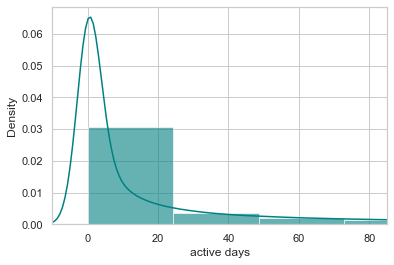

In [42]:
# day_cnt vs. active days 
ax = raw_data1['day_cnt'].hist(bins=15,density=True, stacked=True, color='teal',alpha=0.6)
raw_data1['day_cnt'].plot(kind='density', color='teal')
ax.set(xlabel='active days')
plt.xlim(-10,85)
plt.show()

- 30% of users active between 0 and 25 days
- the number of Hardcore players is relatively small, but their active rate is three or four times higher than regular players

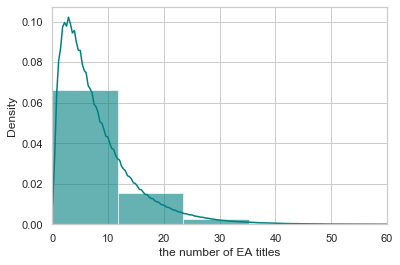

In [43]:
# all_cnt distribution 
# What does the number of EA titles distribution players have? 
ax = raw_data1["all_cnt"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
raw_data1["all_cnt"].plot(kind='density', color='teal')
ax.set(xlabel='the number of EA titles')
plt.xlim(0,60)
plt.show()

In [44]:
#fifa_cnt vs. F15 

raw_data1[["fifa_cnt", "F15"]].groupby(['fifa_cnt'], as_index=False).mean().sort_values(by='F15', ascending=False)

,fifa_cnt,F15
8,9,1.0000
7,8,0.9996
6,7,0.8626
5,6,0.7836
4,5,0.6842
3,4,0.6045
2,3,0.5086
1,2,0.4344
0,1,0.2449


- Players with 9 FIFA accounts all buy F15 
- 50% of players with three FIFA accounts have purchased F15 

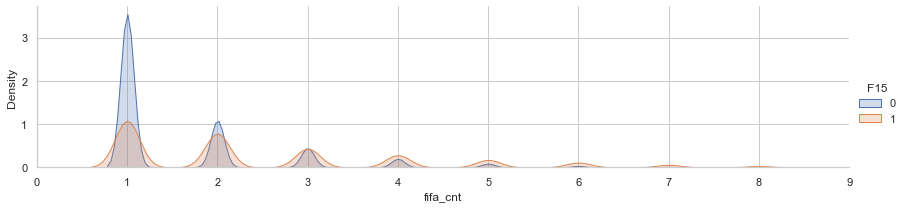

In [45]:
#Fifa_cnt distribution on F15 Purchased vs Non-purchased
a = sns.FacetGrid(raw_data1, hue = 'F15', aspect=4)
a.map(sns.kdeplot, 'fifa_cnt', shade=True)
a.set(xlim=(0, raw_data1['fifa_cnt'].max()))
a.add_legend()

- The node in the red area covering the blue area is at 3 

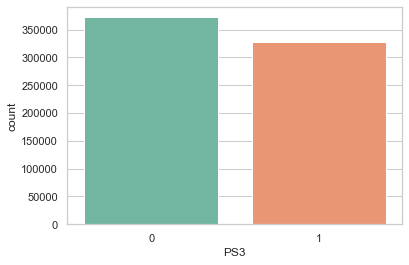

In [46]:
#PS3 distribution 
raw_data1['PS3'].value_counts() #value counts PS3
sns.countplot(x='PS3', data=raw_data1, palette='Set2') #PS3 histogram
plt.show()

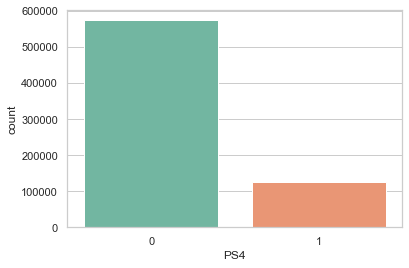

In [47]:
#PS4 distribution 
raw_data1['PS4'].value_counts() #value counts PS4
sns.countplot(x='PS4', data=raw_data1, palette='Set2') #PS4 histogram
plt.show()

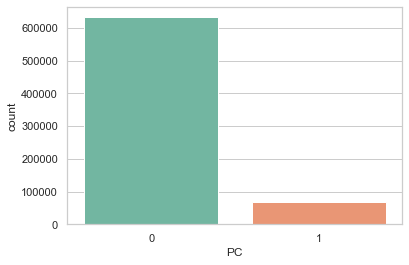

In [48]:
#PC distribution 
raw_data1['PC'].value_counts() #value counts PC
sns.countplot(x='PC', data=raw_data1, palette='Set2') #PC histogram
plt.show()

# Analyzing F15 to F09 Separately  

F15 

In [49]:
raw_data1['F15'].sum()

257428

In [50]:
#Extract F15 > 0 all data to F15Players
F15Players = raw_data1[raw_data1['F15'] > 0]

In [51]:
F15Players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000,257428.0000
mean,58.4999,8.3612,2.4581,1.0000,0.4827,0.3456,0.2535,0.1593,0.1161,0.0561,0.3756,0.3011,0.0976,3.7442,2.7670,1.9817,1.2423,0.8779,0.4086,7.5462
std,64.4686,7.7165,1.6383,0.0000,0.4997,0.4756,0.4350,0.3660,0.3203,0.2300,0.4843,0.4587,0.2968,4.5678,4.2722,3.8113,3.1813,2.7206,1.8932,3.9303
min,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
25%,9.0000,3.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000
50%,34.0000,6.0000,2.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000
75%,88.0000,11.0000,3.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,9.0000,6.0000,1.0000,0.0000,0.0000,0.0000,11.0000
max,364.0000,176.0000,9.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- the average number of active days for F15 Players was 58 days and median was 34 days
- the average number of FIFA Account was around 2
- 38% of PS3 have purchased F15 

In [52]:
#Calculate the total number related to F15 features 
F15Players.sort_values('day_cnt').sum()

run_on      7/3/20157/3/20157/3/20157/3/20157/3/20157/3/20...
day_cnt                                              15059505
all_cnt                                               2152401
fifa_cnt                                               632780
F15                                                    257428
F14                                                    124261
F13                                                     88969
F12                                                     65258
F11                                                     41018
F10                                                     29884
F09                                                     14432
PS3                                                     96680
PS4                                                     77515
PC                                                      25126
F14M                                                   963852
F13M                                                   712314
F12M    

In [53]:
#check F15's active days
F15Players.day_cnt

306014    41
241177    13
613911    37
590002     2
262362     0
          ..
690902    15
509032     0
249651     1
577764     2
32748     20
Name: day_cnt, Length: 257428, dtype: int64

In [54]:
F15_purchased_summary = raw_data1.groupby('F15')
F15_purchased_summary.mean().reset_index()

,F15,day_cnt,all_cnt,fifa_cnt,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
0,0,6.3425,7.8690,1.5787,0.3269,0.3853,0.3374,0.2065,0.1730,0.0856,0.5224,0.1107,0.0961,2.3437,2.8669,2.4414,1.5270,1.2372,0.5884,0.0000
1,1,58.4999,8.3612,2.4581,0.4827,0.3456,0.2535,0.1593,0.1161,0.0561,0.3756,0.3011,0.0976,3.7442,2.7670,1.9817,1.2423,0.8779,0.4086,7.5462


In [55]:
#F09Time Top 5 purchase dates
raw_data1['F15T'].value_counts().head() 

2014-09-23    18026
2014-09-24    12476
2014-12-25     7321
2014-09-25     6062
2014-12-26     5935
Name: F15T, dtype: int64

In [56]:
#Extract F15's year 
F15Y = raw_data1['F15T'].dt.year

In [57]:
#value counts F15Year 
F15Y.value_counts()

2014.0000    157915
2015.0000     99513
Name: F15T, dtype: int64

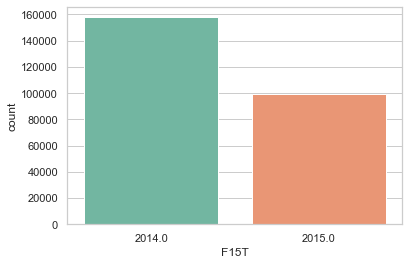

In [58]:
#F15Y histogram 
sns.countplot(x=F15Y, palette='Set2')
plt.show()

In [59]:
#Extract which quarter is active in F15 
F15Q = raw_data1.F15T.dt.quarter

In [60]:
#value counts F15Quarter 
F15Q.value_counts()

4.0000    103689
1.0000     66673
3.0000     54643
2.0000     32423
Name: F15T, dtype: int64

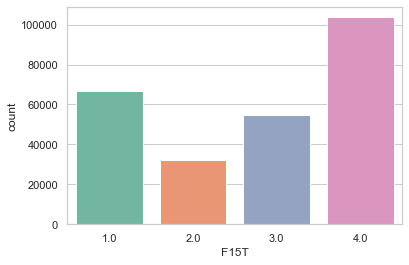

In [61]:
#F15Q histogram 
sns.countplot(x=F15Q,data=raw_data1,palette='Set2')
plt.show()

In [62]:
#F15 month 
raw_data1['F15M'].value_counts().sort_index()

0     442570
1      29106
2      19757
3      17810
4       7096
5      10298
6      15029
7        417
9      54226
10     29942
11     24825
12     48922
Name: F15M, dtype: int64

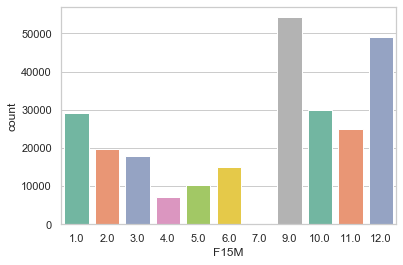

In [63]:
sns.countplot(x='F15M', data=raw_data1[-(raw_data1 == 0)], palette='Set2')
plt.show()

<AxesSubplot:xlabel='F15M'>

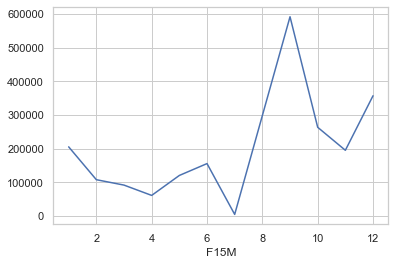

In [64]:
#Dimensional analysis by F15 month 
raw_data1[-(raw_data1 == 0)].groupby('F15M').all_cnt.sum().plot()

In [65]:
#Extract which days are most active in F15T
F15dayinmonth = raw_data1.F15T.dt.days_in_month
F15dayinmonth.value_counts()

31.0000    136495
30.0000    101176
28.0000     19757
Name: F15T, dtype: int64

In [66]:
#F15 day of week 
#Extract which day of the week in F15
F15dayofweek = raw_data1.F15T.dt.dayofweek
F15dayofweek.value_counts()

5.0000    43289
1.0000    41911
6.0000    40273
4.0000    36081
2.0000    34819
3.0000    33552
0.0000    27503
Name: F15T, dtype: int64

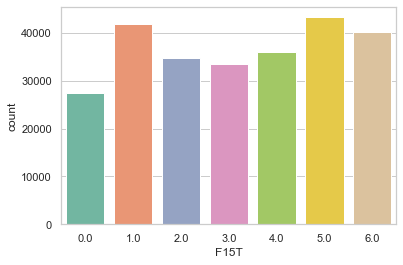

In [67]:
sns.countplot(x=F15dayofweek,palette='Set2')
plt.show()

In [68]:
#total number purchaser and active days by F15 Time  

#group by F15 order time
grouped_F15= raw_data1.groupby('F15T')
grouped_F15_info = grouped_F15[['day_cnt','fifa_cnt','F15']].agg({'day_cnt':sum,'fifa_cnt':sum,'F15':sum})
grouped_F15_info.sort_values(by=['day_cnt'],ascending = False)


,day_cnt,fifa_cnt,F15
F15T,,,
2014-09-23,2474981,68897,18026
2014-09-24,1423407,45477,12476
2014-09-25,609940,20424,6062
2014-09-27,460545,16061,5031
2014-09-26,452792,15287,4650
...,...,...,...
2014-09-13,297,71,21
2014-09-15,247,7,1
2014-09-17,187,7,2


In [69]:
#remove duplicates for F15 User(can use lambda, also can use map, or len)
grouped_F15['postal_code'].unique().apply(lambda x: len(x))

F15T
2014-09-09      1
2014-09-12      1
2014-09-13     16
2014-09-15      1
2014-09-17      2
             ... 
2015-06-28    359
2015-06-29    296
2015-06-30    292
2015-07-01    270
2015-07-02    141
Name: postal_code, Length: 293, dtype: int64

In [70]:
#Assign uniqued F15 players 
grouped_F15_info['F15'] = grouped_F15['postal_code'].unique().map(len)

In [71]:
#Perform index reset to prevent the month from becoming an index
grouped_F15_info = grouped_F15_info.reset_index()

In [72]:
#Turn F15 into object type 
grouped_F15_info['F15T'] = grouped_F15_info['F15T'].astype(str)

In [73]:
# save into excel
grouped_F15_info.to_excel('F15Buyingdate.xlsx') 

In [74]:
grouped_F15_info

,F15T,day_cnt,fifa_cnt,F15
0,2014-09-09,20,5,1
1,2014-09-12,2,2,1
2,2014-09-13,297,71,16
3,2014-09-15,247,7,1
4,2014-09-17,187,7,2
...,...,...,...,...
288,2015-06-28,4848,757,359
289,2015-06-29,3934,626,296
290,2015-06-30,4272,624,292
291,2015-07-01,2915,551,270


In [75]:
# Link or screenshot from Tableau 
#/Users/elaineliu/Library/Mobile Documents/com~apple~CloudDocs/Nick_Projects/First_Project/Modeling/FIFA/F15buyingdate.png
#%%HTMLhttps://10az.online.tableau.com/t/elainedata/views/FIFA/Sheet1?:showAppBanner=false&:display_count=n&:showVizHome=n&:origin=viz_share_link

F14 

In [76]:
raw_data1['F14'].sum()

268944

In [77]:
F14Players = raw_data1[raw_data1['F14'] > 0]

In [78]:
F14Players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000,268944.0000
mean,47.6209,9.6752,2.6326,0.4620,1.0000,0.4054,0.3090,0.1955,0.1425,0.0677,0.4348,0.2583,0.1031,7.4406,3.2587,2.4047,1.5175,1.0775,0.4941,3.8625
std,64.1012,7.9011,1.6224,0.4986,0.0000,0.4910,0.4621,0.3966,0.3496,0.2512,0.4957,0.4377,0.3041,3.5779,4.4683,4.0720,3.4535,2.9755,2.0698,4.7395
min,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,3.0000,4.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,18.0000,7.0000,2.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,70.0000,13.0000,3.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,10.0000,9.0000,4.0000,0.0000,0.0000,0.0000,9.0000
max,364.0000,176.0000,9.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- the average number of active days for F14 Players was 48 days and the median was 18 days 
- the average number of FIFA account was around 3(2.6) and the median value was 2
- 43% F14 Players owned PS3 

In [79]:
F14Players.sort_values('day_cnt').sum()

run_on      7/3/20157/3/20157/3/20157/3/20157/3/20157/3/20...
day_cnt                                              12807343
all_cnt                                               2602099
fifa_cnt                                               708022
F15                                                    124261
F14                                                    268944
F13                                                    109030
F12                                                     83109
F11                                                     52570
F10                                                     38337
F09                                                     18209
PS3                                                    116928
PS4                                                     69474
PC                                                      27733
F14M                                                  2001105
F13M                                                   876419
F12M    

In [80]:
F14Players.day_cnt

306014    41
613911    37
3890      11
17226     31
336042     0
          ..
699987     2
699988    16
699991     9
699994     2
699999     3
Name: day_cnt, Length: 268944, dtype: int64

In [81]:
F14_purchased_summary = raw_data1.groupby('F14')
F14_purchased_summary.mean().reset_index()

,F14,day_cnt,all_cnt,fifa_cnt,F15,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
0,0,11.7368,7.0360,1.4464,0.3089,0.3490,0.3050,0.1852,0.1580,0.0791,0.4894,0.1323,0.0926,0.0000,2.5628,2.1897,1.3629,1.1223,0.5399,2.0967
1,1,47.6209,9.6752,2.6326,0.4620,0.4054,0.3090,0.1955,0.1425,0.0677,0.4348,0.2583,0.1031,7.4406,3.2587,2.4047,1.5175,1.0775,0.4941,3.8625


In [82]:
raw_data1['F14T'].value_counts().head()

2013-09-24    10858
2013-09-25     7810
2013-12-25     6912
2013-12-26     4303
2013-09-28     3753
Name: F14T, dtype: int64

In [83]:
#Extract F14's year 
F14Y = raw_data1['F14T'].dt.year

In [84]:
#value counts F14Year 
F14Y.value_counts()

2014.0000    137845
2013.0000    111742
2015.0000     19357
Name: F14T, dtype: int64

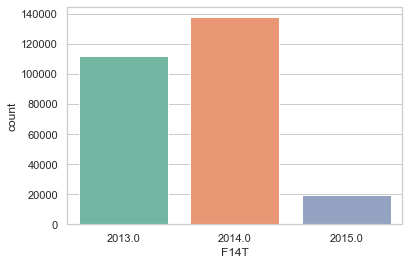

In [85]:
#F14Y histogram 
sns.countplot(x=F14Y, palette='Set2')
plt.show()

In [86]:
#Extract which quarter is active in F14 
F14Q = raw_data1.F14T.dt.quarter

In [87]:
#value counts F14Quarter
F14Q.value_counts()

4.0000    91814
3.0000    77278
1.0000    54618
2.0000    45234
Name: F14T, dtype: int64

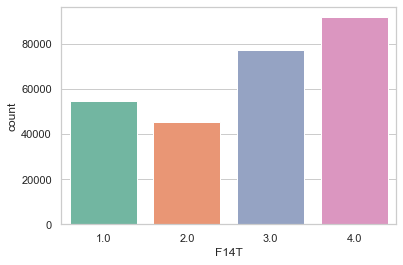

In [88]:
#F14Q histogram 
sns.countplot(x=F14Q,palette='Set2')
plt.show()

In [89]:
#F14 month 
raw_data1['F14M'].value_counts()

0     431054
12     41671
9      41135
10     26403
11     23740
1      23436
6      22021
7      21367
2      15671
3      15511
8      14776
4      11611
5      11602
Name: F14M, dtype: int64

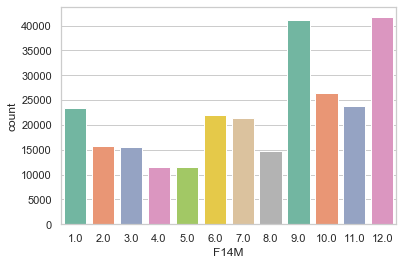

In [90]:
sns.countplot(x='F14M',data=raw_data1[-(raw_data1 == 0)],palette='Set2')
plt.show()

<AxesSubplot:xlabel='F14M'>

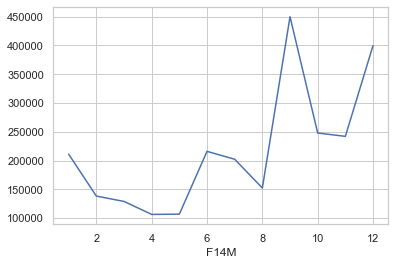

In [91]:
raw_data1[-(raw_data1 == 0)].groupby('F14M').all_cnt.sum().plot()

In [92]:
#Extract which days are most active in F14T
F14dayinmonth = raw_data1.F14T.dt.days_in_month
F14dayinmonth.value_counts()

31.0000    154766
30.0000     98507
28.0000     15671
Name: F14T, dtype: int64

In [93]:
#F14 day of week 
#Extract which day of the week in F14
F14dayofweek = raw_data1.F14T.dt.dayofweek
F14dayofweek.value_counts()

5.0000    46673
6.0000    43151
2.0000    40228
1.0000    38729
4.0000    36618
3.0000    32904
0.0000    30641
Name: F14T, dtype: int64

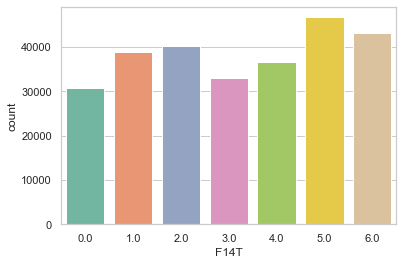

In [94]:
sns.countplot(x=F14dayofweek,palette='Set2')
plt.show()

In [95]:
#F14 total number purchaser and active days by month 

#group by F14 order time, default value is the first day of each month 
grouped_F14M = raw_data1.groupby('F14T')
grouped_F14_info = grouped_F14M[['day_cnt','fifa_cnt','F14']].agg({'day_cnt':sum,'fifa_cnt':sum,'F14':sum})
grouped_F14_info.sort_values(by=['day_cnt'],ascending = False)

,day_cnt,fifa_cnt,F14
F14T,,,
2013-09-24,1047674,49367,10858
2013-09-25,634861,33198,7810
2013-12-25,407170,19204,6912
2013-09-26,258414,15221,3720
2013-09-28,239167,14192,3753
...,...,...,...
2015-05-21,368,65,38
2015-06-12,333,70,48
2013-09-04,247,7,1


F13 

In [96]:
raw_data1['F13'].sum()

259488

In [97]:
F13Players = raw_data1[raw_data1['F13'] > 0]

In [98]:
F13Players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000,259488.0000
mean,33.6120,9.1055,2.7269,0.3429,0.4202,1.0000,0.3902,0.2583,0.1779,0.0820,0.5037,0.1402,0.0868,3.4544,7.6348,3.0562,2.0020,1.3417,0.5976,2.8842
std,58.2410,7.5754,1.6701,0.4747,0.4936,0.0000,0.4878,0.4377,0.3825,0.2744,0.5000,0.3472,0.2815,4.6015,3.5198,4.3837,3.8426,3.2682,2.2615,4.4432
min,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,4.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,4.0000,7.0000,2.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,9.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,41.0000,12.0000,4.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,9.0000,10.0000,7.0000,1.0000,0.0000,0.0000,9.0000
max,363.0000,176.0000,9.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- the average number of active days for F13 Players was 34 days and the median was 4 days 
- the average of FIFA account was around 3(2.7) and the median value was 2
- 50% of F13 Players owned PS3 

In [99]:
F13Players.sort_values('day_cnt').sum()

run_on      7/3/20157/3/20157/3/20157/3/20157/3/20157/3/20...
day_cnt                                               8721907
all_cnt                                               2362760
fifa_cnt                                               707588
F15                                                     88969
F14                                                    109030
F13                                                    259488
F12                                                    101243
F11                                                     67021
F10                                                     46174
F09                                                     21288
PS3                                                    130700
PS4                                                     36375
PC                                                      22522
F14M                                                   896379
F13M                                                  1981135
F12M    

In [100]:
F13Players.day_cnt

613911    37
262362     0
17226     31
471614     0
46946     12
          ..
699978     0
699979    22
699980     2
699984     0
699985    37
Name: day_cnt, Length: 259488, dtype: int64

In [101]:
F13_purchased_summary = raw_data1.groupby('F13')
F13_purchased_summary.mean().reset_index()

,F13,day_cnt,all_cnt,fifa_cnt,F15,F14,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
0,0,20.7591,7.4283,1.4163,0.3824,0.3630,0.2573,0.1484,0.1368,0.0704,0.4476,0.2046,0.1025,2.5078,0.0000,1.8106,1.0808,0.9657,0.4780,2.7110
1,1,33.6120,9.1055,2.7269,0.3429,0.4202,0.3902,0.2583,0.1779,0.0820,0.5037,0.1402,0.0868,3.4544,7.6348,3.0562,2.0020,1.3417,0.5976,2.8842


In [102]:
raw_data1['F13T'].value_counts().head()

2012-09-25    15196
2012-09-26    10194
2012-12-25     6373
2012-09-27     4559
2012-09-29     4350
Name: F13T, dtype: int64

In [103]:
#Extract F13's year 
F13Y = raw_data1['F13T'].dt.year
#value counts F13Year 
F13Y.value_counts()

2012.0000    121717
2013.0000    103864
2014.0000     27934
2015.0000      5973
Name: F13T, dtype: int64

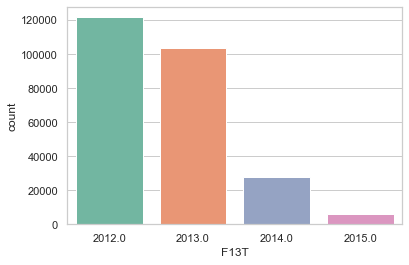

In [104]:
#F13Y histogram 
sns.countplot(x=F13Y,palette='Set2')
plt.show()

In [105]:
#Extract which quarter is active in F13
F13Q = raw_data1.F13T.dt.quarter
#value counts F13Quarter 
F13Q.value_counts()

4.0000    94991
3.0000    75378
1.0000    49952
2.0000    39167
Name: F13T, dtype: int64

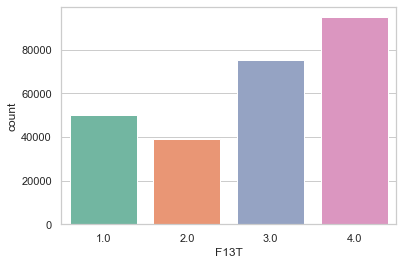

In [106]:
#F13Q histogram 
sns.countplot(x=F13Q,palette='Set2')
plt.show()

In [107]:
#F13 month 
raw_data1['F13M'].value_counts()

0     440510
9      49179
12     36766
10     33761
11     24464
1      20409
6      16927
7      15539
3      15019
2      14524
5      11529
4      10711
8      10660
Name: F13M, dtype: int64

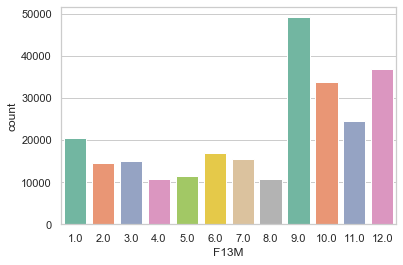

In [108]:
sns.countplot(x='F13M',data=raw_data1[-(raw_data1 == 0)],palette='Set2')
plt.show()

<AxesSubplot:xlabel='F13M'>

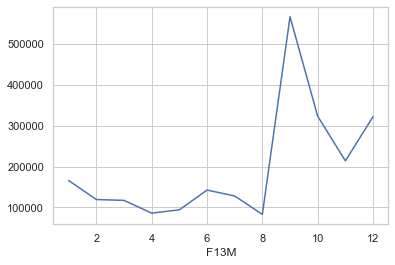

In [109]:
raw_data1[- (raw_data1 == 0)].groupby('F13M').all_cnt.sum().plot()

In [110]:
#Extract which days are most active in F13T
F13dayinmonth = raw_data1.F13T.dt.days_in_month
F13dayinmonth.value_counts()

31.0000    143683
30.0000    101281
28.0000     14524
Name: F13T, dtype: int64

In [111]:
#F13 day of week 
#Extract which day of the week in F13
F13dayofweek = raw_data1.F13T.dt.dayofweek
F13dayofweek.value_counts()

1.0000    46198
5.0000    43730
6.0000    40057
2.0000    37256
4.0000    33377
3.0000    29824
0.0000    29046
Name: F13T, dtype: int64

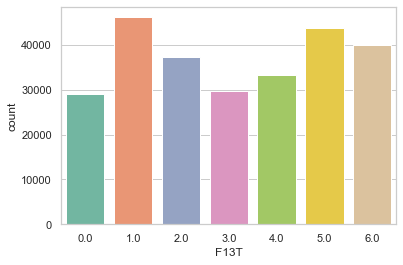

In [112]:
sns.countplot(x=F13dayofweek,palette='Set2')
plt.show()

In [113]:
#F13 total number purchaser and active days by month 
#group by F13 order time, default value is the first day of each month 
grouped_F13M = raw_data1.groupby('F13T')
grouped_F13_info = grouped_F13M[['day_cnt','fifa_cnt','F13']].agg({'day_cnt':sum,'fifa_cnt':sum,'F13':sum})
grouped_F13_info.sort_values(by=['day_cnt'],ascending = False)

,day_cnt,fifa_cnt,F13
F13T,,,
2012-09-25,1065962,70642,15196
2012-09-26,584266,43634,10194
2012-12-25,233054,17518,6373
2012-09-27,216453,18141,4559
2012-09-29,196478,16501,4350
...,...,...,...
2012-09-15,100,32,7
2012-09-16,75,39,8
2015-04-22,74,11,10


F12

In [114]:
raw_data1['F12'].sum()

214588

In [115]:
F12Players = raw_data1[raw_data1['F12'] > 0]

In [116]:
F12Players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000,214588.0000
mean,29.1865,9.8284,2.8733,0.3041,0.3873,0.4718,1.0000,0.3129,0.2267,0.1034,0.5274,0.1407,0.0994,3.1904,3.9620,7.4124,2.4349,1.7123,0.7520,2.5587
std,55.5305,7.7724,1.7552,0.4600,0.4871,0.4992,0.0000,0.4637,0.4187,0.3044,0.4993,0.3478,0.2992,4.5147,4.7107,3.5689,4.1124,3.6061,2.5150,4.2739
min,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,4.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,8.0000,3.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,9.0000,0.0000,0.0000,0.0000,0.0000
75%,30.0000,13.0000,4.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,9.0000,9.0000,10.0000,4.0000,0.0000,0.0000,5.0000
max,363.0000,176.0000,9.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- the average of active days for F12 players was 29 days and the median was 1 day 
- the average number of FIFA account was around 3 (2.8) and the meidan was 3
- PS3 was taken 49.9 % 

In [117]:
F12Players.sort_values('day_cnt').sum()

run_on      7/3/20157/3/20157/3/20157/3/20157/3/20157/3/20...
day_cnt                                               6263068
all_cnt                                               2109057
fifa_cnt                                               616577
F15                                                     65258
F14                                                     83109
F13                                                    101243
F12                                                    214588
F11                                                     67139
F10                                                     48641
F09                                                     22181
PS3                                                    113170
PS4                                                     30201
PC                                                      21331
F14M                                                   684630
F13M                                                   850196
F12M    

In [118]:
F12Players.day_cnt

590002     2
336042     0
46946     12
249636    29
489157     2
          ..
699979    22
699982     0
699984     0
699992     0
699993     0
Name: day_cnt, Length: 214588, dtype: int64

In [119]:
F12_purchased_summary = raw_data1.groupby('F12')
F12_purchased_summary.mean().reset_index()

,F12,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
0,0,23.9044,7.2638,1.4728,0.3959,0.3828,0.3260,0.1345,0.1191,0.0620,0.4423,0.1984,0.0955,2.7121,2.3299,0.0000,0.9747,0.8366,0.4208,2.8708
1,1,29.1865,9.8284,2.8733,0.3041,0.3873,0.4718,0.3129,0.2267,0.1034,0.5274,0.1407,0.0994,3.1904,3.9620,7.4124,2.4349,1.7123,0.7520,2.5587


In [120]:
raw_data1['F12T'].value_counts().head()

2011-09-27    7942
2011-09-28    6565
2011-12-25    4731
2011-09-29    3375
2011-10-01    2969
Name: F12T, dtype: int64

In [121]:
#Extract F12's year 
F12Y = raw_data1['F12T'].dt.year
#value counts F12Year 
F12Y.value_counts()

2012.0000    89432
2011.0000    84921
2013.0000    24860
2014.0000    12265
2015.0000     3110
Name: F12T, dtype: int64

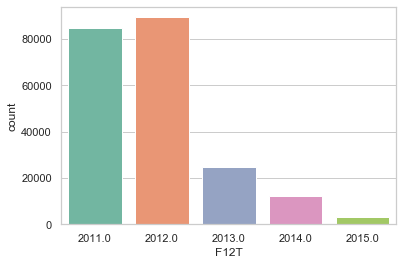

In [122]:
#F12Y histogram 
sns.countplot(x=F12Y, palette='Set2')
plt.show()

In [123]:
#Extract which quarter is active in F12
F12Q = raw_data1.F12T.dt.quarter 
#value counts F12Quarter 
F12Q.value_counts()

4.0000    79707
3.0000    52684
1.0000    43054
2.0000    39143
Name: F12T, dtype: int64

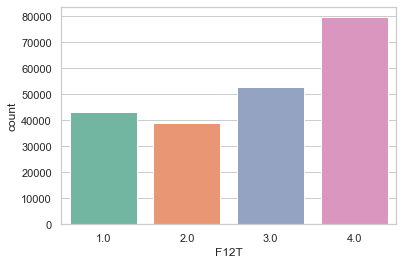

In [124]:
#F12Q histogram 
sns.countplot(x=F12Q,palette='Set2')
plt.show()

In [125]:
#F12 month 
raw_data1['F12M'].value_counts()

0     485410
10     31761
12     28996
9      28623
11     18950
1      17904
6      15842
7      13705
2      12846
3      12304
4      11858
5      11443
8      10356
Name: F12M, dtype: int64

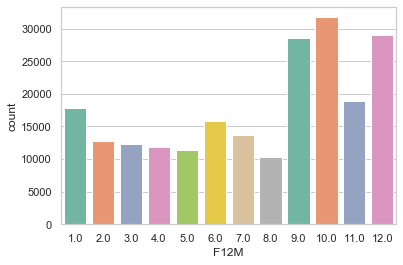

In [126]:
sns.countplot(x='F12M',data=raw_data1[-(raw_data1 == 0)],palette='Set2')
plt.show()

<AxesSubplot:xlabel='F12M'>

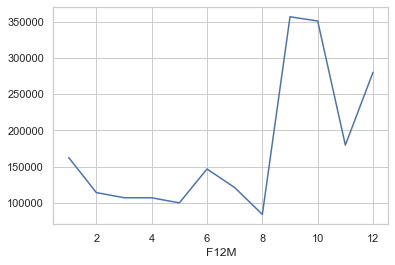

In [127]:
raw_data1[-(raw_data1 == 0)].groupby('F12M').all_cnt.sum().plot()

In [128]:
#Extract which days are most active in F12T
F12dayinmonth = raw_data1.F12T.dt.days_in_month
F12dayinmonth.value_counts()

31.0000    126469
30.0000     75273
29.0000      9036
28.0000      3810
Name: F12T, dtype: int64

In [129]:
#F12 day of week 
#Extract which day of the week in F12
F12dayofweek = raw_data1.F12T.dt.dayofweek 
F12dayofweek.value_counts()

6.0000    37434
5.0000    36753
1.0000    31689
2.0000    28764
4.0000    27959
0.0000    27132
3.0000    24857
Name: F12T, dtype: int64

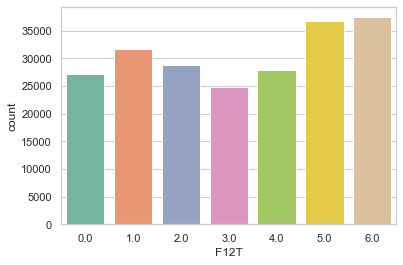

In [130]:
sns.countplot(x=F12dayofweek, palette='Set2')
plt.show()

In [131]:
#F12 Total number purchaser and active days by month 
grouped_F12M = raw_data1.groupby('F12T')
grouped_F12_info = grouped_F12M[['day_cnt','fifa_cnt','F12']].agg({'day_cnt':sum,'fifa_cnt':sum,'F12':sum})
grouped_F12_info.sort_values(by=['day_cnt'],ascending = False)

,day_cnt,fifa_cnt,F12
F12T,,,
2011-09-27,495938,40486,7942
2011-09-28,338492,31130,6565
2011-12-25,170078,15106,4731
2011-09-29,157994,15064,3375
2011-10-01,122128,12079,2969
...,...,...,...
2015-06-10,29,14,11
2015-01-22,29,10,7
2015-06-04,26,11,7


F11

In [132]:
raw_data1['F11'].sum()

132406

In [133]:
F11Players = raw_data1[raw_data1['F11'] > 0]

In [134]:
F11Players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000,132406.0000
mean,28.9061,11.4343,3.3448,0.3098,0.3970,0.5062,0.5071,1.0000,0.3527,0.1694,0.5544,0.1534,0.0992,3.2962,4.3144,4.2321,7.5195,2.6884,1.2391,2.6190
std,55.6653,8.1180,1.8771,0.4624,0.4893,0.5000,0.5000,0.0000,0.4778,0.3751,0.4970,0.3604,0.2990,4.5587,4.7815,4.7674,3.6269,4.2409,3.1381,4.2953
min,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
25%,0.0000,6.0000,2.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,0.0000,0.0000,0.0000
50%,0.0000,9.0000,3.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,9.0000,0.0000,0.0000,0.0000
75%,30.0000,15.0000,5.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,9.0000,9.0000,9.0000,10.0000,6.0000,0.0000,6.0000
max,364.0000,176.0000,9.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- the average number of active days for F11 players was 29 days, and the median was 0
- the average number of FIFA account was around 3.3 and the median value was 3 

In [135]:
F11Players.sort_values('day_cnt').sum()

run_on      7/3/20157/3/20157/3/20157/3/20157/3/20157/3/20...
day_cnt                                               3827347
all_cnt                                               1513973
fifa_cnt                                               442872
F15                                                     41018
F14                                                     52570
F13                                                     67021
F12                                                     67139
F11                                                    132406
F10                                                     46705
F09                                                     22427
PS3                                                     73400
PS4                                                     20313
PC                                                      13141
F14M                                                   436431
F13M                                                   571253
F12M    

In [136]:
F11_purchased_summary = raw_data1.groupby('F11')
F11_purchased_summary.mean().reset_index()

,F11,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
0,0,24.7346,7.2605,1.5656,0.3813,0.3812,0.3391,0.2598,0.1053,0.0526,0.4484,0.1871,0.0961,2.7567,2.4840,1.8151,0.0000,0.7357,0.3551,2.8116
1,1,28.9061,11.4343,3.3448,0.3098,0.3970,0.5062,0.5071,0.3527,0.1694,0.5544,0.1534,0.0992,3.2962,4.3144,4.2321,7.5195,2.6884,1.2391,2.6190


In [137]:
F11Players.day_cnt

284410     11
46946      12
292361      0
235589    105
388927      0
         ... 
699959      0
699963      0
699975     23
699977      0
699999      3
Name: day_cnt, Length: 132406, dtype: int64

In [138]:
#Extract F11's year 
F11Y = raw_data1['F11T'].dt.year
#value counts F11Year 
F11Y.value_counts()

2011.0000    59976
2010.0000    51064
2012.0000    20997
2013.0000      364
2014.0000        5
Name: F11T, dtype: int64

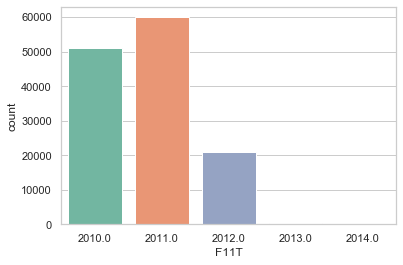

In [139]:
#F11Y histogram 
sns.countplot(x=F11Y, palette='Set2')
plt.show()

In [140]:
#Extract which quarter is active in F11 
F11Q = raw_data1.F11T.dt.quarter 
#value counts F11Quarter 
F11Q.value_counts()

4.0000    52445
3.0000    31611
1.0000    26862
2.0000    21488
Name: F11T, dtype: int64

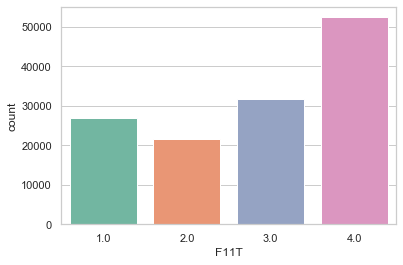

In [141]:
#F11Q histogram 
sns.countplot(x=F11Q,palette='Set2')
plt.show()

In [142]:
#F11 month 
raw_data1['F11M'].value_counts()

0     567592
12     20542
10     20239
9      15455
1      11830
11     11664
7       9132
6       8656
2       7719
3       7313
8       7024
5       6744
4       6088
Name: F11M, dtype: int64

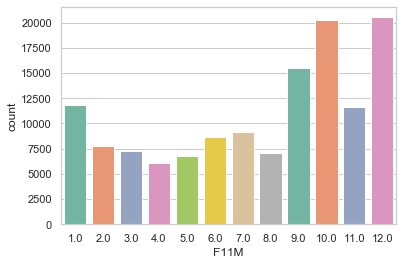

In [143]:
sns.countplot(x='F11M',data=raw_data1[-(raw_data1 == 0)],palette='Set2')
plt.show()

<AxesSubplot:xlabel='F11M'>

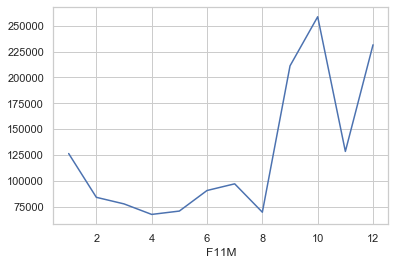

In [144]:
raw_data1[-(raw_data1 == 0)].groupby('F11M').all_cnt.sum().plot()

In [145]:
#Extract F11's day in month 
F11dayinmonth = raw_data1.F11T.dt.days_in_month
F11dayinmonth.value_counts()

31.0000    82824
30.0000    41863
28.0000     5870
29.0000     1849
Name: F11T, dtype: int64

In [146]:
#F11 day of week 
F11dayofweek = raw_data1.F11T.dt.dayofweek
F11dayofweek.value_counts()

5.0000    25066
6.0000    22141
1.0000    19361
2.0000    17270
4.0000    16782
0.0000    16561
3.0000    15225
Name: F11T, dtype: int64

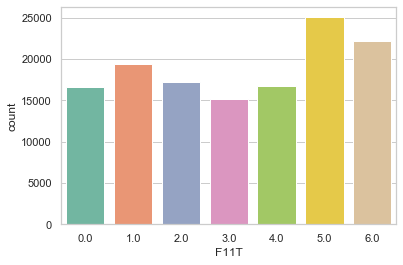

In [147]:
sns.countplot(x=F11dayofweek,palette='Set2')
plt.show()

In [148]:
#F11 total number purchaser & active days by month 
grouped_F11M = raw_data1.groupby('F11T')
grouped_F11_info = grouped_F11M[['day_cnt','fifa_cnt','F11']].agg({'day_cnt':sum,'fifa_cnt':sum,'F11':sum})
grouped_F11_info.sort_values(by=['day_cnt'],ascending = False)

,day_cnt,fifa_cnt,F11
F11T,,,
2010-09-28,266136,25654,4702
2010-09-29,167292,17810,3440
2010-12-25,113894,12316,3430
2010-09-30,70868,8081,1663
2010-10-01,64698,7015,1483
...,...,...,...
2013-01-19,1,4,1
2013-03-19,0,2,1
2014-01-25,0,4,1


F10

In [149]:
raw_data1['F10'].sum()

106454

In [150]:
F10Players = raw_data1[raw_data1['F10'] > 0]

In [151]:
F10Players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000,106454.0000
mean,25.0224,12.5359,3.3465,0.2807,0.3601,0.4337,0.4569,0.4387,1.0000,0.2325,0.5824,0.1570,0.1130,2.9619,3.6773,3.8332,3.6383,7.2665,1.7024,2.3530
std,51.9474,8.6357,1.9925,0.4494,0.4800,0.4956,0.4981,0.4962,0.0000,0.4224,0.4932,0.3638,0.3166,4.4210,4.6513,4.7041,4.6918,3.6527,3.5738,4.1328
min,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
25%,0.0000,6.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000
50%,0.0000,10.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,0.0000,0.0000
75%,21.0000,16.0000,5.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,8.0000,9.0000,9.0000,9.0000,10.0000,0.0000,3.0000
max,364.0000,176.0000,9.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- the average number of active days for F10 Players was 25 days, and the median was 0 
- the average number of fifa account was 3.3 and the median value was 3
- 49% of F10 Players owned PS3 

In [152]:
F10Players.sort_values('day_cnt').sum()

run_on      7/3/20157/3/20157/3/20157/3/20157/3/20157/3/20...
day_cnt                                               2663737
all_cnt                                               1334498
fifa_cnt                                               356247
F15                                                     29884
F14                                                     38337
F13                                                     46174
F12                                                     48641
F11                                                     46705
F10                                                    106454
F09                                                     24753
PS3                                                     62001
PS4                                                     16711
PC                                                      12032
F14M                                                   315310
F13M                                                   391468
F12M    

In [153]:
F10Players.day_cnt

241177    13
262362     0
23266      0
388927     0
216962     0
          ..
699931     1
699942     1
699959     0
699969     0
699973    29
Name: day_cnt, Length: 106454, dtype: int64

In [154]:
F10_purchased_summary = raw_data1.groupby('F10')
F10_purchased_summary.mean().reset_index()

,F10,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
0,0,25.6136,7.2455,1.6431,0.3834,0.3885,0.3594,0.2796,0.1444,0.0464,0.4480,0.1850,0.0937,2.8402,2.6783,1.9924,1.0249,0.0000,0.3107,2.8509
1,1,25.0224,12.5359,3.3465,0.2807,0.3601,0.4337,0.4569,0.4387,0.2325,0.5824,0.1570,0.1130,2.9619,3.6773,3.8332,3.6383,7.2665,1.7024,2.3530


In [155]:
F10Y = raw_data1['F10T'].dt.year
F10Y.value_counts()

2010.0000    55155
2009.0000    33381
2011.0000    17613
2012.0000      183
2013.0000      100
2014.0000       22
Name: F10T, dtype: int64

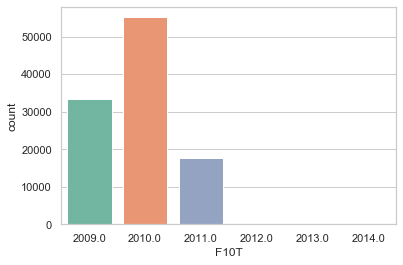

In [156]:
sns.countplot(x=F10Y, palette='Set2')
plt.show()

In [157]:
F10Q = raw_data1.F10T.dt.quarter
F10Q.value_counts()

4.0000    42271
1.0000    22748
2.0000    21216
3.0000    20219
Name: F10T, dtype: int64

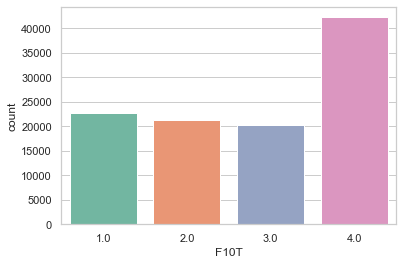

In [158]:
sns.countplot(x=F10Q, palette='Set2')
plt.show()

In [159]:
raw_data1['F10M'].value_counts()

0     593544
12     15905
10     15889
7      10507
11     10477
6      10316
1       9701
2       6694
3       6353
8       5768
5       5720
4       5180
9       3944
Name: F10M, dtype: int64

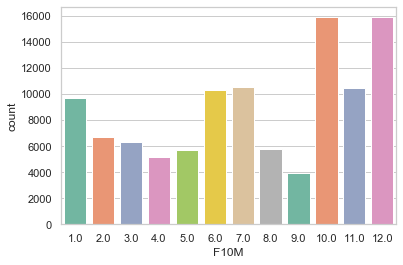

In [160]:
sns.countplot(x='F10M',data=raw_data1[-(raw_data1 == 0)],palette='Set2')
plt.show()

<AxesSubplot:xlabel='F10M'>

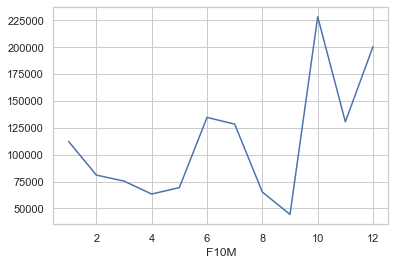

In [161]:
raw_data1[-(raw_data1 == 0)].groupby('F10M').all_cnt.sum().plot()

In [162]:
F10dayinmonth = raw_data1.F10T.dt.days_in_month
F10dayinmonth.value_counts()

31.0000    69843
30.0000    29917
28.0000     6694
Name: F10T, dtype: int64

In [163]:
F10dayofweek = raw_data1.F10T.dt.dayofweek
F10dayofweek.value_counts()

5.0000    18633
6.0000    16869
4.0000    15622
1.0000    15099
2.0000    14267
0.0000    13231
3.0000    12733
Name: F10T, dtype: int64

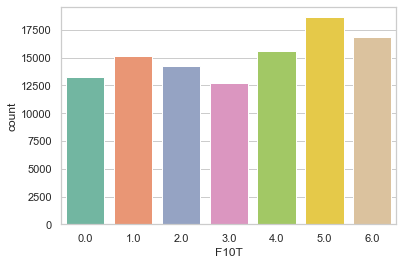

In [164]:
sns.countplot(x=F10dayofweek, palette='Set2')
plt.show()

In [165]:
grouped_F10M = raw_data1.groupby('F10T')
grouped_F10M_info = grouped_F10M[['day_cnt','postal_code','F10M']].agg({'day_cnt':sum,'postal_code':'count','F10M':sum})
grouped_F10M_info.sort_values(by=['day_cnt'],ascending = False)

,day_cnt,postal_code,F10M
F10T,,,
2009-10-20,165358,3168,31680
2009-10-21,108016,2489,24890
2009-12-25,74055,2618,31416
2009-10-22,42319,1241,12410
2009-10-24,37971,1069,10690
...,...,...,...
2012-10-13,0,2,20
2013-08-01,0,2,16
2013-08-02,0,4,32


F09

In [166]:
raw_data1['F09'].sum()

52297

In [167]:
F09Players = raw_data1[raw_data1['F09'] > 0]

In [168]:
F09Players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000,52297.0000
mean,24.7084,12.4842,3.5909,0.2760,0.3482,0.4071,0.4241,0.4288,0.4733,1.0000,0.6096,0.1504,0.1181,2.8844,3.4843,3.5800,3.6319,3.9839,6.9914,2.3248
std,52.3995,9.3663,2.2329,0.4470,0.4764,0.4913,0.4942,0.4949,0.4993,0.0000,0.4878,0.3574,0.3227,4.3959,4.5988,4.6300,4.7097,4.8586,3.7205,4.1081
min,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
25%,0.0000,6.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000
50%,0.0000,10.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,0.0000
75%,19.0000,17.0000,5.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,8.0000,9.0000,9.0000,9.0000,10.0000,10.0000,2.0000
max,364.0000,115.0000,9.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- the average number of active days for F09 Players was 25 days, and the median was 0 
- the average number of fifa account was 3.5 and the median value was 3 
- 61% of F09 users owned PS3 

In [169]:
F09Players.sort_values('day_cnt').sum()

run_on      7/3/20157/3/20157/3/20157/3/20157/3/20157/3/20...
day_cnt                                               1292176
all_cnt                                                652888
fifa_cnt                                               187794
F15                                                     14432
F14                                                     18209
F13                                                     21288
F12                                                     22181
F11                                                     22427
F10                                                     24753
F09                                                     52297
PS3                                                     31881
PS4                                                      7864
PC                                                       6176
F14M                                                   150845
F13M                                                   182217
F12M    

In [170]:
F09Players.day_cnt

249636    29
388927     0
648492    15
640407     4
242248     1
          ..
699898     0
699928     0
699931     1
699942     1
699966     0
Name: day_cnt, Length: 52297, dtype: int64

In [171]:
F09_purchased_summary = raw_data1.groupby('F09')
F09_purchased_summary.mean().reset_index()

,F09,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
0,0,25.5895,7.6920,1.7658,0.3752,0.3871,0.3678,0.2971,0.1698,0.1261,0.4570,0.1831,0.0949,2.8567,2.7774,2.1667,1.2439,0.8726,0.0000,2.8115
1,1,24.7084,12.4842,3.5909,0.2760,0.3482,0.4071,0.4241,0.4288,0.4733,0.6096,0.1504,0.1181,2.8844,3.4843,3.5800,3.6319,3.9839,6.9914,2.3248


In [172]:
F09Y = raw_data1['F09T'].dt.year
F09Y.value_counts()

2009.0000    26919
2008.0000    14448
2010.0000    10266
2011.0000      626
2013.0000       28
2012.0000        7
2014.0000        3
Name: F09T, dtype: int64

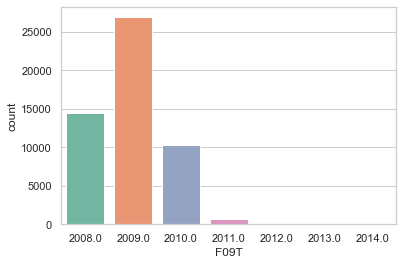

In [173]:
sns.countplot(x=F09Y,palette='Set2')
plt.show()

In [174]:
F09Q = raw_data1.F09T.dt.quarter 
F09Q.value_counts()

4.0000    20057
1.0000    12831
2.0000    10471
3.0000     8938
Name: F09T, dtype: int64

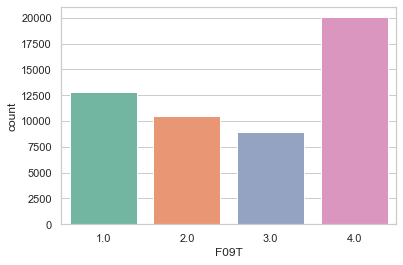

In [175]:
sns.countplot(x=F09Q, palette='Set2')
plt.show()

In [176]:
raw_data1['F09M'].value_counts()

0     647701
10      8601
12      6673
1       5401
11      4783
6       4298
7       4016
2       3813
3       3617
4       3108
5       3065
8       2905
9       2017
Name: F09M, dtype: int64

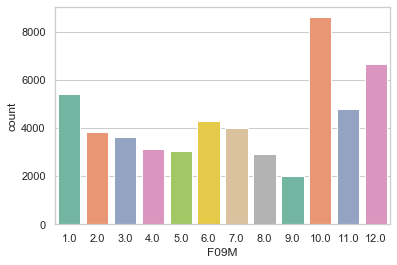

In [177]:
sns.countplot(x='F09M', data=raw_data1[-(raw_data1 == 0)], palette='Set2')
plt.show()

<AxesSubplot:xlabel='F09M'>

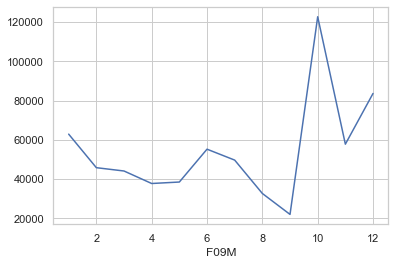

In [178]:
raw_data1[-(raw_data1 == 0)].groupby('F09M').all_cnt.sum().plot()

In [179]:
F09dayinmonth = raw_data1.F09T.dt.days_in_month
F09dayinmonth.value_counts()

31.0000    34278
30.0000    14206
28.0000     3813
Name: F09T, dtype: int64

In [180]:
F09dayofweek = raw_data1.F09T.dt.dayofweek
F09dayofweek.value_counts()

5.0000    9016
6.0000    8324
3.0000    7639
4.0000    7294
2.0000    7124
0.0000    6740
1.0000    6160
Name: F09T, dtype: int64

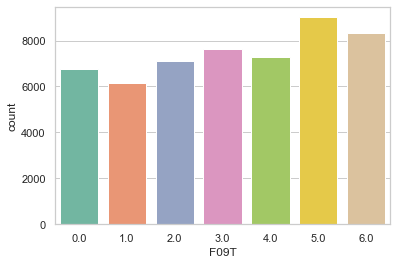

In [181]:
sns.countplot(x=F09dayofweek, palette='Set2')
plt.show()

In [182]:
grouped_F09M = raw_data1.groupby('F09T')
grouped_F09_info = grouped_F09M[['day_cnt','fifa_cnt','F09M']].agg({'day_cnt':sum,'fifa_cnt':sum,'F09M':sum})
grouped_F09_info.sort_values(by=['day_cnt'],ascending = False)

,day_cnt,fifa_cnt,F09M
F09T,,,
2008-10-15,58015,6892,11790
2008-10-16,54313,6748,12320
2008-10-17,27462,3645,7010
2008-10-18,23712,3124,6160
2008-12-25,23512,3301,9072
...,...,...,...
2013-01-31,0,1,1
2013-02-18,0,1,2
2013-02-22,0,1,2


# Time Series Analysis

In [183]:
#F15T - F09T show when different consumers buy FIFA, we can calculate the number of days between them to learn more about their spending habits 

#starting time 
start = raw_data1['F15T']
#Ending time 
end = raw_data1['F14T']
#F15 vs. F14 Days apart
F15_F14 = end-start 
#Sorted F15-F14 days 
F15_F14.sort_values(ascending = True)


276515   -646 days
64457    -646 days
640407   -646 days
433377   -646 days
376381   -645 days
            ...   
699991         NaT
699992         NaT
699993         NaT
699994         NaT
699999         NaT
Length: 699998, dtype: timedelta64[ns]

In [184]:
F15_F14_mean = np.mean(F15_F14)
F15_F14_mean

Timedelta('-278 days +19:20:51.356419396')

In [185]:
#F14 vs. F13 daydiff 
start1 = raw_data1['F14T']
end1 = raw_data1['F13T']
F14_F13 = end1-start1
F14_F13.sort_values(ascending = True)

660040   -1000 days
263666    -997 days
316130    -996 days
191660    -996 days
75821     -995 days
            ...    
699991          NaT
699992          NaT
699993          NaT
699994          NaT
699999          NaT
Length: 699998, dtype: timedelta64[ns]

In [186]:
F14_F13_mean = np.mean(F14_F13)
F14_F13_mean

Timedelta('-327 days +20:27:04.242869640')

In [187]:
#F13 vs. F12 day diff 
start2 = raw_data1['F13T']
end2 = raw_data1['F12T']
F13_F12 = end2-start2
F13_F12.sort_values(ascending = True)

308421   -1337 days
85272    -1329 days
124352   -1328 days
656157   -1327 days
452386   -1323 days
            ...    
699991          NaT
699992          NaT
699993          NaT
699994          NaT
699999          NaT
Length: 699998, dtype: timedelta64[ns]

In [188]:
F13_F12_mean = np.mean(F13_F12)
F13_F12_mean

Timedelta('-292 days +16:33:56.763036032')

In [189]:
#F12 vs. F11 day diff 
start3 = raw_data1['F12T']
end3 = raw_data1['F11T']
F12_F11 = end3-start3
F12_F11.sort_values(ascending = True)

316078   -1681 days
95945    -1675 days
516020   -1657 days
320848   -1652 days
247071   -1637 days
            ...    
699991          NaT
699992          NaT
699993          NaT
699994          NaT
699999          NaT
Length: 699998, dtype: timedelta64[ns]

In [190]:
F12_F11_mean = np.mean(F12_F11)
F12_F11_mean

Timedelta('-299 days +19:20:53.798835724')

In [191]:
#F11 vs. F10 day diff 
start4 = raw_data1['F11T']
end4 = raw_data1['F10T']
F11_F10 = end4-start4
F11_F10.sort_values(ascending = True)

201808   -1171 days
225544   -1160 days
197929   -1141 days
679241   -1141 days
139944   -1129 days
            ...    
699991          NaT
699992          NaT
699993          NaT
699994          NaT
699999          NaT
Length: 699998, dtype: timedelta64[ns]

In [192]:
F11_F10_mean = np.mean(F11_F10)
F11_F10_mean

Timedelta('-273 days +14:50:47.570923676')

In [193]:
#F10 vs. F09 day diff 
start5 = raw_data1['F10T']
end5 = raw_data1['F09T']
F10_F09 = end5-start5
F10_F09.sort_values(ascending = True)

474815   -2168 days
221679   -1765 days
288708   -1416 days
224293   -1341 days
175121   -1081 days
            ...    
699991          NaT
699992          NaT
699993          NaT
699994          NaT
699999          NaT
Length: 699998, dtype: timedelta64[ns]

In [194]:
F10_F09_mean = np.mean(F10_F09)
F10_F09_mean

Timedelta('-282 days +07:35:54.938795328')

# Different Type of Players

In [195]:
#according to day_cnt, we divide users into four different levels: 
#inactive players (0)
#casual players (1-10)
#regular players (11-50)
#hardcore players (51-365)
 
#inactive_players 
raw_data1.loc[raw_data1['day_cnt'] == 0, 'Player'] = 'inactive'
inactive_players = raw_data1.loc[raw_data1['Player'] == 'inactive']

#casual players 
raw_data1.loc[(raw_data1['day_cnt'] >= 1) & (raw_data1['day_cnt'] <= 10), 'Player'] = 'casual'
casual_players = raw_data1.loc[raw_data1['Player'] == 'casual']

#regular_players
raw_data1.loc[(raw_data1['day_cnt'] > 10) & (raw_data1['day_cnt'] <= 50), 'Player'] = 'regular'
regular_players = raw_data1.loc[raw_data1['Player'] == 'regular']

#hardcore 
raw_data1.loc[raw_data1['day_cnt'] > 50, 'Player'] = 'hardcore'
hardcore_players = raw_data1.loc[raw_data1['Player'] == 'hardcore']

inactive_players

In [196]:
inactive_players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000,278625.0000
mean,0.0000,7.7504,1.5159,0.0085,0.1392,0.3613,0.3585,0.2455,0.2127,0.1096,0.5548,0.0822,0.1050,1.0532,2.6896,2.5896,1.8079,1.5151,0.7495,0.0548
std,0.0000,6.6517,0.9294,0.0918,0.3462,0.4804,0.4796,0.4304,0.4092,0.3124,0.4970,0.2747,0.3066,2.9996,4.1974,4.0956,3.6523,3.3670,2.4662,0.7525
min,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,3.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,6.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,10.0000,2.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,5.0000,5.0000,0.0000,0.0000,0.0000,0.0000
max,0.0000,153.0000,8.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- proportion from largest to smallest (mean) F13 > F12 > F11 > F10 > F14 > F09 > F15 
- 55.48 % of inactive_players have PS3 

In [197]:
#fifa_cnt vs. inactive players  
inactive_players[['fifa_cnt','F15']].groupby(['fifa_cnt'], as_index=False).mean().sort_values(by='F15', ascending=False)

,fifa_cnt,F15
0,1,0.0108
6,7,0.0093
2,3,0.0043
3,4,0.0036
1,2,0.0034
5,6,0.0031
4,5,0.0026
7,8,0.0000


In [198]:
inactive_players 

,run_on,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,...,F10T,F09T,F14M,F13M,F12M,F11M,F10M,F09M,F15M,Player
262362,7/3/2015,72653,0,15,3,1,0,1,0,0,...,2011-01-25,NaT,0,3,0,0,1,0,7,inactive
471614,7/3/2015,92627,0,4,2,1,0,1,0,0,...,NaT,NaT,0,2,0,0,0,0,7,inactive
336042,7/3/2015,28790.0000,0,4,3,1,1,0,1,0,...,NaT,NaT,12,0,8,0,0,0,7,inactive
23266,7/3/2015,77845,0,22,3,1,0,1,0,0,...,2011-09-25,NaT,0,3,0,0,9,0,7,inactive
292361,7/3/2015,32817,0,8,3,1,0,1,0,1,...,NaT,NaT,0,11,0,12,0,0,7,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699978,7/3/2015,11385,0,2,2,0,0,1,1,0,...,NaT,NaT,0,1,8,0,0,0,0,inactive
699982,7/3/2015,1463,0,1,1,0,0,0,1,0,...,NaT,NaT,0,0,10,0,0,0,0,inactive
699984,7/3/2015,91505,0,3,2,0,0,1,1,0,...,NaT,NaT,0,2,12,0,0,0,0,inactive
699992,7/3/2015,19046,0,8,1,0,0,0,1,0,...,NaT,NaT,0,0,10,0,0,0,0,inactive


In [199]:
# Qs: how many days different between each FIFA account for inactive players 

# inactive players F15 and F14 daydiff
inactive_players['F15DayDiff'] = (inactive_players['F15T'] - inactive_players['F14T']).dt.days
inactive_players['F15DayDiff'] 


262362        nan
471614        nan
336042   569.0000
23266         nan
292361        nan
           ...   
699978        nan
699982        nan
699984        nan
699992        nan
699993        nan
Name: F15DayDiff, Length: 278625, dtype: float64

In [200]:
#inactive players F15 DayDiff's mean and std(on average, how far each score lies from the mean) 
inactive_F15_F14 = inactive_players.groupby('postal_code').agg({'F15DayDiff':['mean','std']}).reset_index()
inactive_F15_F14

postal_code F15DayDiff    
                        mean std
0            1001        nan nan
1            1002        nan nan
2            1003        nan nan
3            1007        nan nan
4            1010        nan nan
...           ...        ...  ..
22230       99686        nan nan
22231       99692        nan nan
22232       99701        nan nan
22233       99702        nan nan
22234       99712        nan nan

[22235 rows x 3 columns]

In [201]:
F15_F14_mean = np.mean(inactive_players['F15DayDiff'])
F15_F14_mean

318.34736842105264

In [202]:
#inactive players F14 and F13 daydiff 
inactive_players['F14DayDiff'] = (inactive_players['F14T'] - inactive_players['F13T']).dt.days

#inactive players F14 DayDiff's mean and std(on average, how far each score lies from the mean) 
inactive_F14_F13 = inactive_players.groupby('postal_code').agg({'F14DayDiff':['mean','std']}).reset_index()
inactive_F14_F13

postal_code F14DayDiff    
                        mean std
0            1001        nan nan
1            1002   493.0000 nan
2            1003   459.0000 nan
3            1007        nan nan
4            1010        nan nan
...           ...        ...  ..
22230       99686        nan nan
22231       99692        nan nan
22232       99701        nan nan
22233       99702        nan nan
22234       99712        nan nan

[22235 rows x 3 columns]

In [203]:
F14_F13_mean = np.mean(inactive_players['F14DayDiff'])
F14_F13_mean

300.2861429350791

In [204]:
#inactive players F13 and F12 daydiff, mean, std 
inactive_players['F13DayDiff'] = (inactive_players['F13T'] - inactive_players['F12T']).dt.days
inactive_F13_F12 = inactive_players.groupby('postal_code').agg({'F13DayDiff':['mean','std']}).reset_index()
inactive_F13_F12

postal_code F13DayDiff         
                        mean      std
0            1001   149.6667 130.4160
1            1002   307.4167 147.4834
2            1003   322.0000  65.0538
3            1007        nan      nan
4            1010        nan      nan
...           ...        ...      ...
22230       99686        nan      nan
22231       99692        nan      nan
22232       99701   160.0000      nan
22233       99702        nan      nan
22234       99712        nan      nan

[22235 rows x 3 columns]

In [205]:
F13_F12_mean = np.mean(inactive_players['F13DayDiff'])
F13_F12_mean

285.59458259325044

In [206]:
#inactive players F12 and F11 daydiff, mean, std 
inactive_players['F12DayDiff'] = (inactive_players['F12T'] - inactive_players['F11T']).dt.days
inactive_F12_F11 = inactive_players.groupby('postal_code').agg({'F12DayDiff':['mean','std']}).reset_index()
inactive_F12_F11

postal_code F12DayDiff         
                        mean      std
0            1001   407.3333 142.1349
1            1002   314.1111 197.1233
2            1003   346.7500  71.5117
3            1007        nan      nan
4            1010   399.0000      nan
...           ...        ...      ...
22230       99686        nan      nan
22231       99692        nan      nan
22232       99701        nan      nan
22233       99702        nan      nan
22234       99712        nan      nan

[22235 rows x 3 columns]

In [207]:
F12_F11_mean = np.mean(inactive_players['F12DayDiff'])
F12_F11_mean

283.3164738731552

In [208]:
#inactive players F11 and F10 daydiff, mean, std 
inactive_players['F11DayDiff'] = (inactive_players['F11T'] - inactive_players['F10T']).dt.days
inactive_F11_F10 = inactive_players.groupby('postal_code').agg({'F11DayDiff':['mean','std']}).reset_index()
inactive_F11_F10

postal_code F11DayDiff         
                        mean      std
0            1001   239.5000  96.8736
1            1002   230.7500 177.7106
2            1003   341.7500 191.0417
3            1007        nan      nan
4            1010        nan      nan
...           ...        ...      ...
22230       99686        nan      nan
22231       99692        nan      nan
22232       99701        nan      nan
22233       99702   362.0000      nan
22234       99712        nan      nan

[22235 rows x 3 columns]

In [209]:
F11_F10_mean = np.mean(inactive_players['F11DayDiff'])
F11_F10_mean

270.88516944761113

In [210]:
#inactive players F10 and F09 daydiff, mean, std 
inactive_players['F10DayDiff'] = (inactive_players['F10T'] - inactive_players['F09T']).dt.days
inactive_F10_F09 = inactive_players.groupby('postal_code').agg({'F10DayDiff':['mean','std']}).reset_index()
inactive_F10_F09

postal_code F10DayDiff         
                        mean      std
0            1001        nan      nan
1            1002   326.5000 434.8707
2            1003   241.0000 106.7755
3            1007        nan      nan
4            1010        nan      nan
...           ...        ...      ...
22230       99686        nan      nan
22231       99692        nan      nan
22232       99701        nan      nan
22233       99702        nan      nan
22234       99712        nan      nan

[22235 rows x 3 columns]

In [211]:
F10_F09_mean = np.mean(inactive_players['F10DayDiff'])
F10_F09_mean

271.98189061934085

In [212]:
#How many PS3 owners are in inactive group
inactive_players['PS3'].sum()

154577

In [213]:
#How many PS4 owners are in inactive group
inactive_players['PS4'].sum()

22914

In [214]:
#How many PC owners are in inactive group 
inactive_players['PC'].sum()

29265

casual_players

In [215]:
casual_players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000,170919.0000
mean,3.9543,8.2260,1.6317,0.3990,0.4282,0.3116,0.2303,0.1102,0.0852,0.0379,0.4289,0.1966,0.0971,2.9916,2.3147,1.6707,0.8250,0.6193,0.2639,2.3593
std,2.8075,7.2328,1.0919,0.4897,0.4948,0.4632,0.4210,0.3131,0.2791,0.1909,0.4949,0.3975,0.2961,4.1707,3.9751,3.4991,2.6400,2.2937,1.5147,3.8156
min,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,3.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,3.0000,6.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,6.0000,11.0000,2.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,6.0000,3.0000,0.0000,0.0000,0.0000,0.0000,3.0000
max,10.0000,176.0000,9.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- Fifa distribution among casual players: F14 > F15 > F13 > F12 > F11 > F10 > F09 
- 43% PS3 players have PS3 

In [216]:
#fifa_cnt vs. casual players  
casual_players[['fifa_cnt','F15']].groupby(['fifa_cnt'], as_index=False).mean().sort_values(by='F15', ascending=False)

,fifa_cnt,F15
7,8,1.0000
8,9,1.0000
6,7,0.6154
5,6,0.5475
4,5,0.4809
3,4,0.4416
2,3,0.4140
1,2,0.3998
0,1,0.3876


- Casual players with 8 or 9 Fifa accounts will definitely purchase F15 

In [217]:
#casual players F15 and F14 daydiff, mean, std 
casual_players['F15DayDiff'] = (casual_players['F15T'] - casual_players['F14T']).dt.days
casual_F15_F14 = casual_players.groupby('postal_code').agg({'F15DayDiff':['mean','std']}).reset_index()
casual_F15_F14

postal_code F15DayDiff         
                        mean      std
0            1001        nan      nan
1            1002   459.0000 136.4295
2            1003   364.0000      nan
3            1007        nan      nan
4       1012.0000        nan      nan
...           ...        ...      ...
19190       99701        nan      nan
19191       99703        nan      nan
19192       99705        nan      nan
19193       99801        nan      nan
19194       99901        nan      nan

[19195 rows x 3 columns]

In [218]:
F15_F14_mean = np.mean(casual_players['F15DayDiff'])
F15_F14_mean

298.0934606692425

In [219]:
#casual players F14 and F13 daydiff, mean, std 
casual_players['F14DayDiff'] = (casual_players['F14T'] - casual_players['F13T']).dt.days
casual_F14_F13 = casual_players.groupby('postal_code').agg({'F14DayDiff':['mean','std']}).reset_index()
casual_F14_F13

postal_code F14DayDiff         
                        mean      std
0            1001        nan      nan
1            1002   427.3333 175.5365
2            1003   503.5000 197.2828
3            1007   364.0000      nan
4       1012.0000        nan      nan
...           ...        ...      ...
19190       99701        nan      nan
19191       99703        nan      nan
19192       99705        nan      nan
19193       99801        nan      nan
19194       99901        nan      nan

[19195 rows x 3 columns]

In [220]:
F14_F13_mean = np.mean(casual_players['F14DayDiff'])
F14_F13_mean

352.1920960985212

In [221]:
#casual players F13 and F12 daydiff, mean, std 
casual_players['F13DayDiff'] = (casual_players['F13T'] - casual_players['F12T']).dt.days
casual_F13_F12 = casual_players.groupby('postal_code').agg({'F13DayDiff':['mean','std']}).reset_index()
casual_F13_F12

postal_code F13DayDiff         
                        mean      std
0            1001        nan      nan
1            1002   162.8571 196.6371
2            1003   258.6667 113.7776
3            1007    90.0000      nan
4       1012.0000        nan      nan
...           ...        ...      ...
19190       99701        nan      nan
19191       99703        nan      nan
19192       99705        nan      nan
19193       99801        nan      nan
19194       99901        nan      nan

[19195 rows x 3 columns]

In [222]:
F13_F12_mean = np.mean(casual_players['F13DayDiff'])
F13_F12_mean

301.0115307683257

In [223]:
#casual players F12 and F11 daydiff, mean, std 
casual_players['F12DayDiff'] = (casual_players['F12T'] - casual_players['F11T']).dt.days
casual_F12_F11 = casual_players.groupby('postal_code').agg({'F12DayDiff':['mean','std']}).reset_index()
casual_F12_F11

postal_code F12DayDiff         
                        mean      std
0            1001        nan      nan
1            1002   523.0000 376.7811
2            1003        nan      nan
3            1007   367.0000      nan
4       1012.0000        nan      nan
...           ...        ...      ...
19190       99701        nan      nan
19191       99703        nan      nan
19192       99705        nan      nan
19193       99801        nan      nan
19194       99901        nan      nan

[19195 rows x 3 columns]

In [224]:
F12_F11_mean = np.mean(casual_players['F12DayDiff'])
F12_F11_mean

322.1441796336419

In [225]:
#casual players F11 and F10 daydiff, mean, std 
casual_players['F11DayDiff'] = (casual_players['F11T'] - casual_players['F10T']).dt.days
casual_F11_F10 = casual_players.groupby('postal_code').agg({'F11DayDiff':['mean','std']}).reset_index()
casual_F11_F10

postal_code F11DayDiff        
                        mean     std
0            1001        nan     nan
1            1002   282.0000 94.1042
2            1003        nan     nan
3            1007   329.0000     nan
4       1012.0000        nan     nan
...           ...        ...     ...
19190       99701        nan     nan
19191       99703        nan     nan
19192       99705        nan     nan
19193       99801        nan     nan
19194       99901        nan     nan

[19195 rows x 3 columns]

In [226]:
F11_F10_mean = np.mean(casual_players['F11DayDiff'])
F11_F10_mean

278.64689052853487

In [227]:
#casual players F10 and F09 daydiff, mean, std 
casual_players['F10DayDiff'] = (casual_players['F10T'] - casual_players['F09T']).dt.days
casual_F10_F09 = casual_players.groupby('postal_code').agg({'F10DayDiff':['mean','std']}).reset_index()
casual_F10_F09

postal_code F10DayDiff         
                        mean      std
0            1001        nan      nan
1            1002   230.6667 161.2028
2            1003        nan      nan
3            1007        nan      nan
4       1012.0000        nan      nan
...           ...        ...      ...
19190       99701        nan      nan
19191       99703        nan      nan
19192       99705        nan      nan
19193       99801        nan      nan
19194       99901        nan      nan

[19195 rows x 3 columns]

In [228]:
F10_F09_mean = np.mean(casual_players['F10DayDiff'])
F10_F09_mean

286.11003919204103

In [229]:
#How many PS3 owners are in casual group 
casual_players['PS3'].sum()

73314

In [230]:
#How many PS4 owners are in casual group 
casual_players['PS4'].sum()

33608

In [231]:
#How many PC owners are in casual group
casual_players['PC'].sum()

16603

regular_players

In [232]:
regular_players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000,133282.0000
mean,25.6203,8.1074,2.1307,0.6256,0.5453,0.3602,0.2550,0.1466,0.1109,0.0493,0.3931,0.2516,0.0829,3.9929,2.7800,1.9270,1.1255,0.8213,0.3561,4.5885
std,11.2954,7.1819,1.4294,0.4840,0.4979,0.4800,0.4358,0.3538,0.3140,0.2165,0.4884,0.4339,0.2757,4.4853,4.2488,3.7399,3.0440,2.6226,1.7670,4.8593
min,11.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,16.0000,3.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,23.0000,6.0000,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000
75%,34.0000,11.0000,3.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,8.0000,6.0000,1.0000,0.0000,0.0000,0.0000,10.0000
max,50.0000,144.0000,9.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- regular players distribution: F15 > F14 > F13 > F12 > F11 > F10 > F09(only 0.049)
- 39% regular players have PS3 and 25% players own PS4 

In [233]:
#fifa_cnt vs. regular players   
regular_players[['fifa_cnt','F15']].groupby(['fifa_cnt'], as_index=False).mean().sort_values(by='F15', ascending=False)

,fifa_cnt,F15
7,8,1.0000
8,9,1.0000
6,7,0.8712
5,6,0.8392
4,5,0.7719
3,4,0.7246
2,3,0.6833
1,2,0.6753
0,1,0.5278


- Players with 8 or 9 fifa accounts will definitely purchase F15 
- Over 50% of Regular players with only one account purchased F15 

In [234]:
#regular players F15 and F14 daydiff, mean, std 
regular_players['F15DayDiff'] = (regular_players['F15T'] - regular_players['F14T']).dt.days
regular_F15_F14 = regular_players.groupby('postal_code').agg({'F15DayDiff':['mean','std']}).reset_index()
regular_F15_F14

postal_code F15DayDiff         
                        mean      std
0            1001   231.5000  66.8805
1            1002   341.0000  81.1936
2            1003   350.8571 172.2831
3            1005   193.0000      nan
4            1007   365.0000      nan
...           ...        ...      ...
17001       99501        nan      nan
17002       99506   358.0000      nan
17003       99508   271.3333 218.0856
17004       99577        nan      nan
17005       99705        nan      nan

[17006 rows x 3 columns]

In [235]:
F15_F14_mean = np.mean(regular_players['F15DayDiff'])
F15_F14_mean

274.1410186794092

In [236]:
#regular players F14 and F13 daydiff, mean, std 
regular_players['F14DayDiff'] = (regular_players['F14T'] - regular_players['F13T']).dt.days
regular_F14_F13 = regular_players.groupby('postal_code').agg({'F14DayDiff':['mean','std']}).reset_index()
regular_F14_F13

postal_code F14DayDiff         
                        mean      std
0            1001   366.0000      nan
1            1002   304.8889 210.7270
2            1003   425.8333 100.0128
3            1005        nan      nan
4            1007   263.3333  96.3397
...           ...        ...      ...
17001       99501        nan      nan
17002       99506        nan      nan
17003       99508   521.5000 195.8686
17004       99577        nan      nan
17005       99705        nan      nan

[17006 rows x 3 columns]

In [237]:
F14_F13_mean = np.mean(regular_players['F14DayDiff'])
F14_F13_mean

335.98150466855077

In [238]:
#regular players F13 and F12 daydiff, mean, std 
regular_players['F13DayDiff'] = (regular_players['F13T'] - regular_players['F12T']).dt.days
regular_F13_F12 = regular_players.groupby('postal_code').agg({'F13DayDiff':['mean','std']}).reset_index()
regular_F13_F12

postal_code F13DayDiff         
                        mean      std
0            1001        nan      nan
1            1002   192.0000 211.2842
2            1003   376.0000  26.8701
3            1005        nan      nan
4            1007   212.5000 276.4788
...           ...        ...      ...
17001       99501        nan      nan
17002       99506        nan      nan
17003       99508        nan      nan
17004       99577        nan      nan
17005       99705        nan      nan

[17006 rows x 3 columns]

In [239]:
F13_F12_mean = np.mean(regular_players['F13DayDiff'])
F13_F12_mean

297.96282164171805

In [240]:
#regular players F12 and F11 daydiff, mean, std 
regular_players['F12DayDiff'] = (regular_players['F12T'] - regular_players['F11T']).dt.days
regular_F12_F11 = regular_players.groupby('postal_code').agg({'F12DayDiff':['mean','std']}).reset_index()
regular_F12_F11

postal_code F12DayDiff    
                        mean std
0            1001        nan nan
1            1002        nan nan
2            1003   284.0000 nan
3            1005        nan nan
4            1007   314.0000 nan
...           ...        ...  ..
17001       99501        nan nan
17002       99506        nan nan
17003       99508        nan nan
17004       99577        nan nan
17005       99705        nan nan

[17006 rows x 3 columns]

In [241]:
F12_F11_mean = np.mean(regular_players['F12DayDiff'])
F12_F11_mean

310.8137658355523

In [242]:
#regular players F11 and F10 daydiff, mean, std 
regular_players['F11DayDiff'] = (regular_players['F11T'] - regular_players['F10T']).dt.days
regular_F11_F10 = regular_players.groupby('postal_code').agg({'F11DayDiff':['mean','std']}).reset_index()
regular_F11_F10

postal_code F11DayDiff         
                        mean      std
0            1001        nan      nan
1            1002   306.0000 172.5341
2            1003   210.0000      nan
3            1005        nan      nan
4            1007        nan      nan
...           ...        ...      ...
17001       99501        nan      nan
17002       99506        nan      nan
17003       99508        nan      nan
17004       99577        nan      nan
17005       99705        nan      nan

[17006 rows x 3 columns]

In [243]:
F11_F10_mean = np.mean(regular_players['F11DayDiff'])
F11_F10_mean

276.52562704471103

In [244]:
#regular players F10 and F09 daydiff, mean, std 
regular_players['F10DayDiff'] = (regular_players['F10T'] - regular_players['F09T']).dt.days
regular_F10_F09 = regular_players.groupby('postal_code').agg({'F10DayDiff':['mean','std']}).reset_index()
regular_F10_F09

postal_code F10DayDiff    
                        mean std
0            1001        nan nan
1            1002   546.0000 nan
2            1003        nan nan
3            1005        nan nan
4            1007        nan nan
...           ...        ...  ..
17001       99501        nan nan
17002       99506        nan nan
17003       99508        nan nan
17004       99577        nan nan
17005       99705        nan nan

[17006 rows x 3 columns]

In [245]:
F10_F09_mean = np.mean(regular_players['F10DayDiff'])
F10_F09_mean

293.6055068226121

In [246]:
#How many PS3 players in regular group 
regular_players['PS3'].sum()

52392

In [247]:
#How many PS4 players in regular group
regular_players['PS4'].sum()

33531

In [248]:
#How many PC players in regular group
regular_players['PC'].sum()

11044

hardcore_players

In [249]:
hardcore_players.describe()

,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M,F15M
count,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000,117172.0000
mean,117.5701,8.4405,2.9550,0.8832,0.7192,0.4913,0.3530,0.2186,0.1523,0.0744,0.4062,0.3109,0.0918,5.6682,3.9736,2.7880,1.7144,1.1614,0.5482,7.7879
std,58.5126,7.2379,1.7199,0.3212,0.4494,0.4999,0.4779,0.4133,0.3593,0.2624,0.4911,0.4629,0.2888,4.5661,4.6314,4.2752,3.6315,3.0829,2.1798,4.1084
min,51.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,71.0000,3.0000,2.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000
50%,101.0000,6.0000,3.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000
75%,149.0000,11.0000,4.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,10.0000,9.0000,6.0000,0.0000,0.0000,0.0000,11.0000
max,364.0000,145.0000,9.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000


- hardcore players distribution: F15 > F14 > F13 > F12 > F11 > F10 > F09 
- 41% hardcore players have PS3 & 31% players own PS4 

In [250]:
#fifa_cnt vs. hardcore players   
hardcore_players[['fifa_cnt','F15']].groupby(['fifa_cnt'], as_index=False).mean().sort_values(by='F15', ascending=False)

,fifa_cnt,F15
7,8,1.0000
8,9,1.0000
6,7,0.9823
5,6,0.9719
4,5,0.9508
3,4,0.9371
2,3,0.9078
1,2,0.8958
0,1,0.7356


- Hardcore players with 8 or 9 fifa accounts will definitely purchase F15 
- 74 % of hardcore players purchased F15

In [251]:
#Hardcore players F15 and F14 daydiff, mean, std 
hardcore_players['F15DayDiff'] = (hardcore_players['F15T'] - hardcore_players['F14T']).dt.days
hardcore_F15_F14 = hardcore_players.groupby('postal_code').agg({'F15DayDiff':['mean','std']}).reset_index()
hardcore_F15_F14

postal_code F15DayDiff         
                        mean      std
0            1001   240.0000 176.5106
1            1002   313.2500  85.2911
2            1003   254.6250 121.2659
3            1007        nan      nan
4            1013   348.2500 138.3627
...           ...        ...      ...
15198       99348        nan      nan
15199       99507        nan      nan
15200       99654   432.0000      nan
15201       99801   192.0000      nan
15202       99835   166.0000      nan

[15203 rows x 3 columns]

In [252]:
F15_F14_mean = np.mean(hardcore_players['F15DayDiff'])
F15_F14_mean

274.7739245011343

In [253]:
#Hardcore players F14 and F13 daydiff, mean, std 
hardcore_players['F14DayDiff'] = (hardcore_players['F14T'] - hardcore_players['F13T']).dt.days
hardcore_F14_F13 = hardcore_players.groupby('postal_code').agg({'F14DayDiff':['mean','std']}).reset_index()
hardcore_F14_F13

postal_code F14DayDiff         
                        mean      std
0            1001   191.5000 266.5793
1            1002   286.8000 123.4079
2            1003   303.5000 168.8441
3            1007        nan      nan
4            1013   282.0000  73.3689
...           ...        ...      ...
15198       99348        nan      nan
15199       99507        nan      nan
15200       99654        nan      nan
15201       99801   518.0000      nan
15202       99835        nan      nan

[15203 rows x 3 columns]

In [254]:
F14_F13_mean = np.mean(hardcore_players['F14DayDiff'])
F14_F13_mean

317.3140128755365

In [255]:
#Hardcore players F13 and F12 daydiff, mean, std 
hardcore_players['F13DayDiff'] = (hardcore_players['F13T'] - hardcore_players['F12T']).dt.days
hardcore_F13_F12 = hardcore_players.groupby('postal_code').agg({'F13DayDiff':['mean','std']}).reset_index()
hardcore_F13_F12

postal_code F13DayDiff         
                        mean      std
0            1001        nan      nan
1            1002   300.5000 132.2963
2            1003   259.3333 119.7386
3            1007        nan      nan
4            1013   -32.0000 352.1392
...           ...        ...      ...
15198       99348        nan      nan
15199       99507        nan      nan
15200       99654        nan      nan
15201       99801        nan      nan
15202       99835        nan      nan

[15203 rows x 3 columns]

In [256]:
F13_F12_mean = np.mean(hardcore_players['F13DayDiff'])
F13_F12_mean

287.5692641363284

In [257]:
#Hardcore players F12 and F11 daydiff, mean, std 
hardcore_players['F12DayDiff'] = (hardcore_players['F12T'] - hardcore_players['F11T']).dt.days
hardcore_F12_F11 = hardcore_players.groupby('postal_code').agg({'F12DayDiff':['mean','std']}).reset_index()
hardcore_F12_F11

postal_code F12DayDiff         
                        mean      std
0            1001   399.0000      nan
1            1002   246.6667 142.9429
2            1003   301.5000   7.7782
3            1007        nan      nan
4            1013        nan      nan
...           ...        ...      ...
15198       99348        nan      nan
15199       99507        nan      nan
15200       99654        nan      nan
15201       99801        nan      nan
15202       99835        nan      nan

[15203 rows x 3 columns]

In [258]:
F12_F11_mean = np.mean(hardcore_players['F12DayDiff'])
F12_F11_mean

296.83044770003073

In [259]:
#Hardcore players F11 and F10 daydiff, mean, std 
hardcore_players['F11DayDiff'] = (hardcore_players['F11T'] - hardcore_players['F10T']).dt.days
hardcore_F11_F10 = hardcore_players.groupby('postal_code').agg({'F11DayDiff':['mean','std']}).reset_index()
hardcore_F11_F10

postal_code F11DayDiff         
                        mean      std
0            1001   326.0000      nan
1            1002    66.6667 118.5341
2            1003   466.0000      nan
3            1007        nan      nan
4            1013        nan      nan
...           ...        ...      ...
15198       99348        nan      nan
15199       99507        nan      nan
15200       99654        nan      nan
15201       99801        nan      nan
15202       99835        nan      nan

[15203 rows x 3 columns]

In [260]:
F11_F10_mean = np.mean(hardcore_players['F11DayDiff'])
F11_F10_mean

268.63030448333734

In [261]:
#Hardcore players F10 and F09 daydiff, mean, std 
hardcore_players['F10DayDiff'] = (hardcore_players['F10T'] - hardcore_players['F09T']).dt.days
hardcore_F10_F09 = hardcore_players.groupby('postal_code').agg({'F10DayDiff':['mean','std']}).reset_index()
hardcore_F10_F09

postal_code F10DayDiff    
                        mean std
0            1001   220.0000 nan
1            1002        nan nan
2            1003        nan nan
3            1007        nan nan
4            1013        nan nan
...           ...        ...  ..
15198       99348        nan nan
15199       99507        nan nan
15200       99654        nan nan
15201       99801        nan nan
15202       99835        nan nan

[15203 rows x 3 columns]

In [262]:
F10_F09_mean = np.mean(hardcore_players['F10DayDiff'])
F10_F09_mean

288.606393129771

In [263]:
#How many PS3 players among hardcore group 
hardcore_players['PS3'].sum()

47599

In [264]:
#How many PS4 players among hardcore group 
hardcore_players['PS4'].sum()

36434

In [265]:
#How many PC players among hardcore group 
hardcore_players['PC'].sum()

10758

In [266]:
raw_data2 = copy.deepcopy(raw_data1)

# Feature selection 

In [267]:
# we need to factor the features of categories, so we can input all numerical features 
#get dummies (dummies_players = pd.get_dummies(raw_data2['Player'],prefix='Player'))
# pd.concat([dummies_player, raw_data2], axis='columns')

In [268]:
raw_data2.columns

Index(['run_on', 'postal_code', 'day_cnt', 'all_cnt', 'fifa_cnt', 'F15', 'F14',
       'F13', 'F12', 'F11', 'F10', 'F09', 'PS3', 'PS4', 'PC', 'F15T', 'F14T',
       'F13T', 'F12T', 'F11T', 'F10T', 'F09T', 'F14M', 'F13M', 'F12M', 'F11M',
       'F10M', 'F09M', 'F15M', 'Player'],
      dtype='object')

In [269]:
# drop F15 columns, run_on, and Player 
df_data = raw_data2.drop(['run_on','F15M','F15T','Player','F15T','F14T','F13T','F12T','F11T','F10T','F09T'], axis=1)

In [270]:
df_data

,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M
306014,88352,41,13,2,1,1,0,0,0,0,0,0,0,0,12,0,0,0,0,0
241177,70810,13,36,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
613911,98802,37,7,3,1,1,1,0,0,0,0,0,0,0,4,9,0,0,0,0
590002,94041,2,3,2,1,0,0,1,0,0,0,0,0,0,0,0,5,0,0,0
262362,72653,0,15,3,1,0,1,0,0,1,0,0,0,0,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699991,10469,9,2,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
699992,19046,0,8,1,0,0,0,1,0,0,0,1,0,0,0,0,10,0,0,0
699993,94086,0,2,1,0,0,0,1,0,0,0,1,0,0,0,0,10,0,0,0
699994,35476,2,7,1,0,1,0,0,0,0,0,1,0,0,12,0,0,0,0,0


In [271]:
#All features's Correlations

pd.DataFrame(abs(df_data.corr()['F15']).sort_values(ascending = False))

,F15
F15,1.0000
day_cnt,0.5144
fifa_cnt,0.3168
PS4,0.2387
F14M,0.1591
F14,0.1544
PS3,0.1419
F12,0.0878
F10,0.0764
F10M,0.0583


- Over 0.1 features: F15M > day_cnt > fifa_cnt > PS4 > F14M > F14 > PS3 

In [272]:
#Coorelation map method 1 
#Correlation heatmap Definition
def correlation_heatmap(df_data, method):
    _ , ax = plt.subplots(figsize =(11, 9), dpi=100)
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df_data.corr(method=method),
        cmap = colormap,
        square=True, 
        annot=True, 
        annot_kws={'fontsize': 6}
    )
    
    plt.title('Correlation Matrix', y=1.05, size=20)

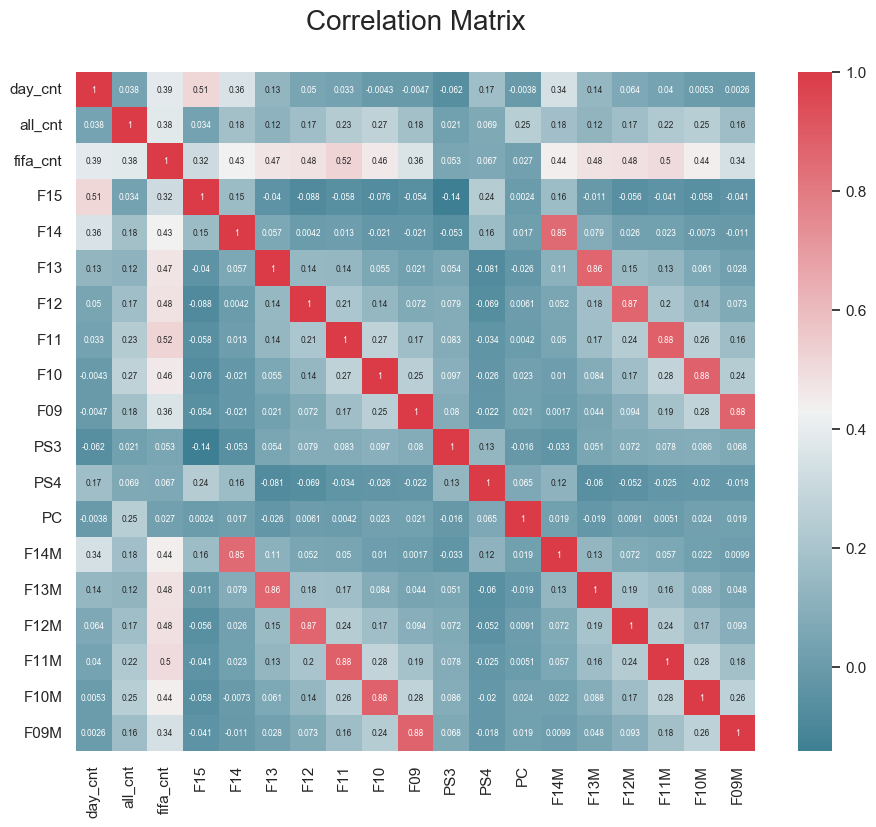

In [273]:
#Show Heatmap 
correlation_heatmap(df_data, 'pearson')

In [274]:
#Original Data  - 14
df_original_data = raw_data2[['F15','postal_code','day_cnt','all_cnt','fifa_cnt','F14','F13','F12','F11','F10','F09','PS3','PS4','PC']]

In [275]:
corr = df_original_data.corr()**2
corr.F15.sort_values(ascending = False)

F15        1.0000
day_cnt    0.2646
fifa_cnt   0.1003
PS4        0.0570
F14        0.0239
PS3        0.0201
F12        0.0077
F10        0.0058
F11        0.0034
F09        0.0029
F13        0.0016
all_cnt    0.0011
PC         0.0000
Name: F15, dtype: float64

- Over 0.005 features: day_cnt > fifa_cnt > PS4 > F14 > PS3 > F12 > F10

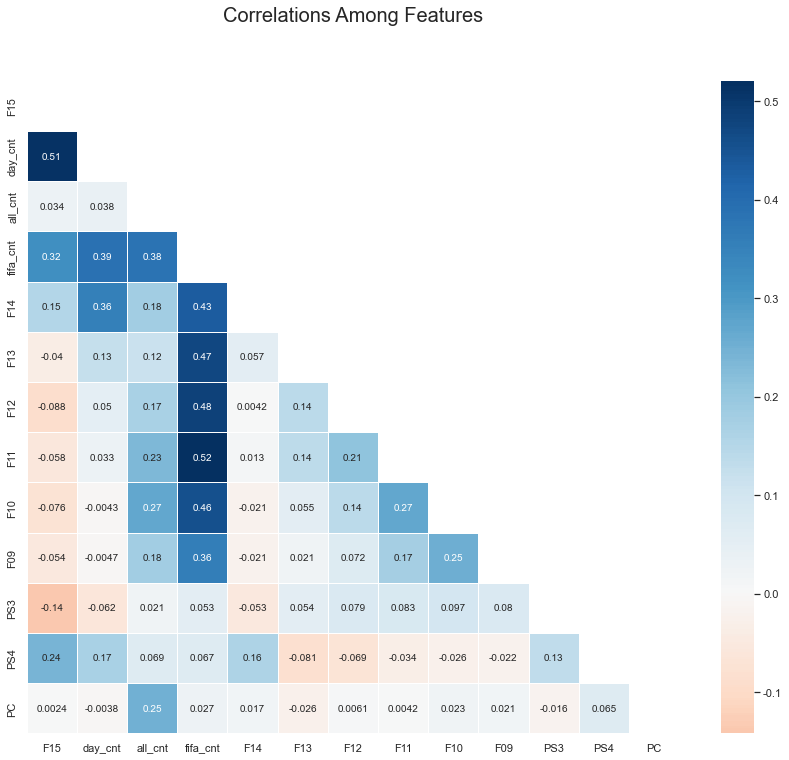

In [276]:
#Coorelation map method 2
#df_original heatmeap among features
mask = np.zeros_like(df_original_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df_original_data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

## Pre-Modeling Tasks

### Standardized Processing 

In [277]:
df_data.columns

Index(['postal_code', 'day_cnt', 'all_cnt', 'fifa_cnt', 'F15', 'F14', 'F13',
       'F12', 'F11', 'F10', 'F09', 'PS3', 'PS4', 'PC', 'F14M', 'F13M', 'F12M',
       'F11M', 'F10M', 'F09M'],
      dtype='object')

In [278]:
scaler = preprocessing.StandardScaler()
#Method 1: normalize the dataset 
def fit_transform(df):
    df2 = scaler.fit_transform(df.values.reshape(-1,1))
    return df2

In [279]:
# df_data preprocessing 
df_data['postal_code'] = fit_transform(df_data['postal_code'])
df_data['day_cnt'] = fit_transform(df_data['day_cnt'])
df_data['fifa_cnt'] = fit_transform(df_data['fifa_cnt'])
df_data['all_cnt'] = fit_transform(df_data['all_cnt'])
df_data['F14M'] = fit_transform(df_data['F14M'])
df_data['F13M'] = fit_transform(df_data['F13M'])
df_data['F12M'] = fit_transform(df_data['F12M'])
df_data['F11M'] = fit_transform(df_data['F11M'])
df_data['F10M'] = fit_transform(df_data['F10M'])
df_data['F09M'] = fit_transform(df_data['F09M'])



In [280]:
df_data

,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M
306014,1.2305,0.3165,0.7068,0.0731,1,1,0,0,0,0,0,0,0,0,2.1536,-0.6636,-0.5756,-0.4258,-0.3717,-0.2486
241177,0.6731,-0.2561,3.9911,0.0731,1,0,0,0,0,1,0,0,0,0,-0.6735,-0.6636,-0.5756,-0.4258,-0.0353,-0.2486
613911,1.5625,0.2347,-0.1499,0.8202,1,1,1,0,0,0,0,0,0,0,0.2689,1.4466,-0.5756,-0.4258,-0.3717,-0.2486
590002,1.4112,-0.4811,-0.7211,0.0731,1,0,0,1,0,0,0,0,0,0,-0.6735,-0.6636,0.6910,-0.4258,-0.3717,-0.2486
262362,0.7316,-0.5220,0.9924,0.8202,1,0,1,0,0,1,0,0,0,0,-0.6735,0.0398,-0.5756,-0.4258,-0.0353,-0.2486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699991,-1.2442,-0.3380,-0.8639,-0.6739,0,1,0,0,0,0,0,0,1,0,-0.4379,-0.6636,-0.5756,-0.4258,-0.3717,-0.2486
699992,-0.9717,-0.5220,-0.0071,-0.6739,0,0,0,1,0,0,0,1,0,0,-0.6735,-0.6636,1.9575,-0.4258,-0.3717,-0.2486
699993,1.4127,-0.5220,-0.8639,-0.6739,0,0,0,1,0,0,0,1,0,0,-0.6735,-0.6636,1.9575,-0.4258,-0.3717,-0.2486
699994,-0.4496,-0.4811,-0.1499,-0.6739,0,1,0,0,0,0,0,1,0,0,2.1536,-0.6636,-0.5756,-0.4258,-0.3717,-0.2486


In [281]:
# Assign value to X and y (df_data)
df_y = df_data.F15
df_X = df_data.drop(['F15'], axis='columns')

df_original_data

In [282]:
df_original_data.columns

Index(['F15', 'postal_code', 'day_cnt', 'all_cnt', 'fifa_cnt', 'F14', 'F13',
       'F12', 'F11', 'F10', 'F09', 'PS3', 'PS4', 'PC'],
      dtype='object')

In [283]:
#Assign value to original X and y (df_original_data)
original_X = np.asarray(df_original_data[['postal_code','day_cnt','all_cnt','fifa_cnt','F14','F13','F12','F11','F10','F09','PS3','PS4','PC']])
original_X[0:5]

array([[88352, 41, 13, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [70810, 13, 36, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [98802, 37, 7, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [94041, 2, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [72653, 0, 15, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0]], dtype=object)

In [284]:
original_y = np.asarray(df_original_data['F15'])
original_y[0:5]

array([1, 1, 1, 1, 1])

In [285]:
#Method2: normalize the dataset 
original_X = preprocessing.StandardScaler().fit(original_X).transform(original_X)
original_X[0:5]

array([[ 1.23045775,  0.31654142,  0.70682131,  0.07311487,  1.26600351,
        -0.76750419, -0.66488779, -0.48298729, -0.42350109, -0.28415225,
        -0.93868443, -0.46962593, -0.3271349 ],
       [ 0.67307094, -0.25614995,  3.99105584,  0.07311487, -0.78988723,
        -0.76750419, -0.66488779, -0.48298729,  2.36126901, -0.28415225,
        -0.93868443, -0.46962593, -0.3271349 ],
       [ 1.5625004 ,  0.23472837, -0.14993553,  0.82015205,  1.26600351,
         1.30292449, -0.66488779, -0.48298729, -0.42350109, -0.28415225,
        -0.93868443, -0.46962593, -0.3271349 ],
       [ 1.41122241, -0.48113585, -0.72110675,  0.07311487, -0.78988723,
        -0.76750419,  1.50401318, -0.48298729, -0.42350109, -0.28415225,
        -0.93868443, -0.46962593, -0.3271349 ],
       [ 0.73163119, -0.52204238,  0.99240692,  0.82015205, -0.78988723,
         1.30292449, -0.66488779, -0.48298729,  2.36126901, -0.28415225,
        -0.93868443, -0.46962593, -0.3271349 ]])

# Train/Test Dataset Splitting

df_data

In [286]:
#df_data splitting 
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_X,df_y, test_size= .30, random_state=0)
print('train:', len(X_train1), 'test:',len(X_test1))

train: 489998 test: 210000


df_original_data

In [287]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(original_X, original_y, test_size= .33, random_state=0)
print('train:', len(X_train_original), 'test:', len(X_test_original))

train: 468998 test: 231000


# Modeling

df_original_data modeling

In [288]:
#X_train and X_test 
pd.DataFrame(X_train_original).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.4524,0.3984,-0.7211,0.0731,-0.7899,-0.7675,1.5040,-0.4830,-0.4235,-0.2842,-0.9387,-0.4696,-0.3271
1,-0.1699,-0.5220,-0.4355,-0.6739,-0.7899,-0.7675,1.5040,-0.4830,-0.4235,-0.2842,1.0653,-0.4696,3.0568
2,-0.2423,-0.5016,-0.8639,-0.6739,1.2660,-0.7675,-0.6649,-0.4830,-0.4235,-0.2842,-0.9387,-0.4696,-0.3271
3,-0.6617,0.7461,-1.0067,-0.6739,-0.7899,-0.7675,-0.6649,-0.4830,-0.4235,-0.2842,-0.9387,-0.4696,-0.3271
4,-1.1628,0.3779,-0.0071,0.0731,1.2660,-0.7675,-0.6649,-0.4830,-0.4235,-0.2842,-0.9387,-0.4696,-0.3271


In [289]:
#Looking for best k 
for k in ('lbfgs', 'saga','liblinear','newton-cg','sag'):
    lr_model = LogisticRegression(C=0.01, solver=k).fit(X_train_original, y_train_original)
    lr_yhat = lr_model.predict(X_test_original)
    y_prob = lr_model.predict_proba(X_test_original)
    print("When Solver is {}, logloss is: {}".format(k, log_loss(y_test_original, y_prob)))

When Solver is lbfgs, logloss is: 0.08809938879698177
When Solver is saga, logloss is: 0.0880981357167062
When Solver is liblinear, logloss is: 0.08834634638378122
When Solver is newton-cg, logloss is: 0.08809944238946153
When Solver is sag, logloss is: 0.08809941772967009


In [290]:
k = 'liblinear'
LR = LogisticRegression(C=0.01,solver=k).fit(X_train_original,y_train_original)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [291]:
#Once the model is trained
# find out how well the model is preforming, try to test the model
LRyhat = LR.predict(X_test_original)
LRyhat[0:5]

array([0, 0, 0, 1, 0])

In [292]:
LRyhat_prob = LR.predict_proba(X_test_original)
LRyhat_prob[0:5]

array([[0.99952836, 0.00047164],
       [0.99780734, 0.00219266],
       [0.99317759, 0.00682241],
       [0.05156172, 0.94843828],
       [0.99394537, 0.00605463]])

In [293]:
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test_original, LRyhat),\
            columns=['F15 Predicted Not-purchased', 'F15 Predicted Purchased'],\
            index=['F15 Actual Not-purchased','F15 Actual Purchased'])

,F15 Predicted Not-purchased,F15 Predicted Purchased
F15 Actual Not-purchased,138944,7070
F15 Actual Purchased,720,84266


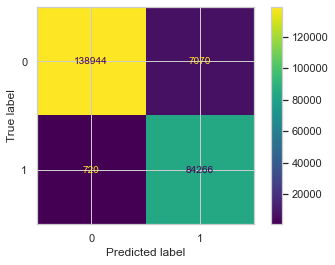

In [294]:
cm_original = confusion_matrix(y_test_original, LRyhat)
cm_original_display = ConfusionMatrixDisplay(cm_original).plot()

In [295]:
#Accuracy Score 
accuracy_score(y_test_original, LRyhat) 

0.9662770562770563

In [296]:
#confusion matrix classification report
print(classification_report(y_test_original, LRyhat))


              precision    recall  f1-score   support

           0       0.99      0.95      0.97    146014
           1       0.92      0.99      0.96     84986

    accuracy                           0.97    231000
   macro avg       0.96      0.97      0.96    231000
weighted avg       0.97      0.97      0.97    231000



0.9945717060977489


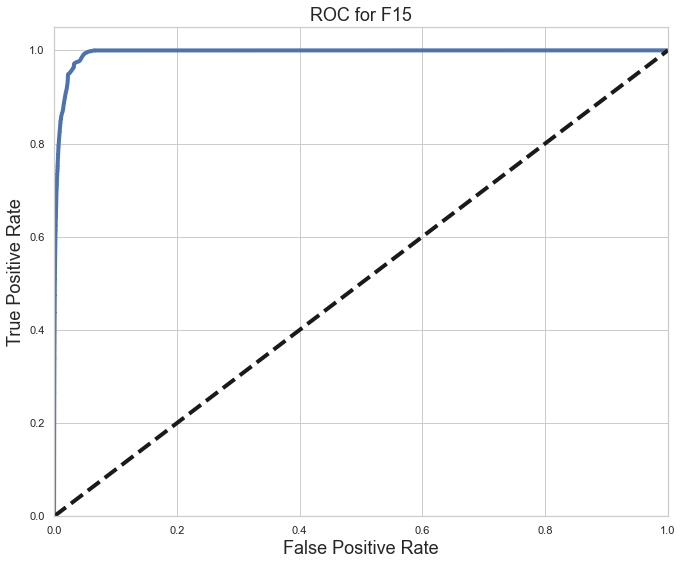

In [297]:
#calculated the value of y_score by decision_function(X_test) is used in the roc_curve function 
y_score_original = LR.decision_function(X_test_original)

#Compute ROC curve and ROC area for each class 
#Calculate the true positive rate and false positive rate 
FPR_original, TPR_original, _= roc_curve(y_test_original, y_score_original)
#Calculate the value of auc
ROC_AUC_original = auc(FPR_original, TPR_original)
print(ROC_AUC_original)

#Adjusting Curve Figure 
plt.figure(figsize=[11,9])
plt.plot(FPR_original, TPR_original, label='ROC curve(area= %0.2f)'%ROC_AUC_original,linewidth=4)
plt.plot([0,1],[0,1],'k--',linewidth=4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for F15', fontsize=18)
plt.show()

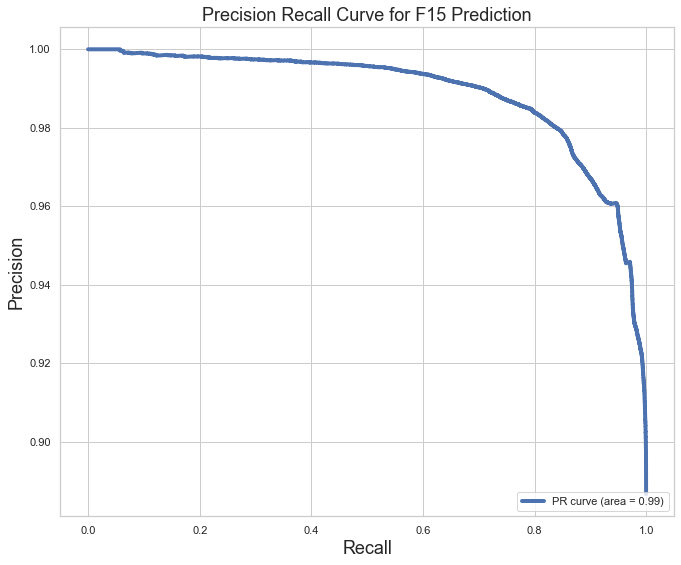

In [298]:
# precision recall curve 

precision_original, recall_original, _ = precision_recall_curve(y_test_original, y_score_original)
PR_AUC = auc(recall_original, precision_original)

plt.figure(figsize=[11,9])
plt.plot(recall_original, precision_original, label='PR curve (area = %0.2f)' % PR_AUC,
        linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for F15 Prediction', fontsize=18)
plt.legend(loc='lower right')
plt.show()




In [299]:
#Logistic regression system optimization
#Associate model coefficients with features 

#Model coefficients are associated with features
pd.DataFrame({"columns":list(df_original_data)[1:],"coef":list(LR.coef_.T)})


,columns,coef
0,postal_code,[0.08363216709326037]
1,day_cnt,[1.411540479021473]
2,all_cnt,[-0.047031872624852665]
3,fifa_cnt,[9.757110553395531]
4,F14,[-3.3027939912461535]
5,F13,[-3.3442850728674114]
6,F12,[-3.34110257113647]
7,F11,[-2.975084388666716]
8,F10,[-2.968856668257125]
9,F09,[-2.3233536509959554]


In the list above, + indicates that this feature is positively correlated with the result of F15 purchase, while - indicates that this feature is negatively correlated with the result of F15 purchase:
- Postal_code is positively correlated with the purchase of F15, but the effect coefficient is small
- day_cnt has a high positive correlation with F15 purchase; 
- fifa_cnt (FIFA accounts) is directly influence the purchase of F15 (strong positive correlation); in contrast, a negative correlation is between all_cnt and F15 
- F14-f09 is negatively correlated with F15
- PS3 is slightly negatively correlated with F15 purchases, while PS4 is positively correlated with F15 
- PS3/PS4/PC Rank of relevance: PS4>PC>PS3

df_data modeling 

In [300]:
df_data

,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M
306014,1.2305,0.3165,0.7068,0.0731,1,1,0,0,0,0,0,0,0,0,2.1536,-0.6636,-0.5756,-0.4258,-0.3717,-0.2486
241177,0.6731,-0.2561,3.9911,0.0731,1,0,0,0,0,1,0,0,0,0,-0.6735,-0.6636,-0.5756,-0.4258,-0.0353,-0.2486
613911,1.5625,0.2347,-0.1499,0.8202,1,1,1,0,0,0,0,0,0,0,0.2689,1.4466,-0.5756,-0.4258,-0.3717,-0.2486
590002,1.4112,-0.4811,-0.7211,0.0731,1,0,0,1,0,0,0,0,0,0,-0.6735,-0.6636,0.6910,-0.4258,-0.3717,-0.2486
262362,0.7316,-0.5220,0.9924,0.8202,1,0,1,0,0,1,0,0,0,0,-0.6735,0.0398,-0.5756,-0.4258,-0.0353,-0.2486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699991,-1.2442,-0.3380,-0.8639,-0.6739,0,1,0,0,0,0,0,0,1,0,-0.4379,-0.6636,-0.5756,-0.4258,-0.3717,-0.2486
699992,-0.9717,-0.5220,-0.0071,-0.6739,0,0,0,1,0,0,0,1,0,0,-0.6735,-0.6636,1.9575,-0.4258,-0.3717,-0.2486
699993,1.4127,-0.5220,-0.8639,-0.6739,0,0,0,1,0,0,0,1,0,0,-0.6735,-0.6636,1.9575,-0.4258,-0.3717,-0.2486
699994,-0.4496,-0.4811,-0.1499,-0.6739,0,1,0,0,0,0,0,1,0,0,2.1536,-0.6636,-0.5756,-0.4258,-0.3717,-0.2486


In [301]:
#Looking for best k 
for k in ('lbfgs', 'saga','liblinear','newton-cg','sag'):
    lr_model1 = LogisticRegression(C=0.01, solver=k).fit(X_train1, y_train1)
    lr_yhat1 = lr_model1.predict(X_test1)
    y_prob1 = lr_model1.predict_proba(X_test1)
    print("When Solver is {}, logloss is: {}".format(k, log_loss(y_test1, y_prob1)))

When Solver is lbfgs, logloss is: 0.09757014803606663
When Solver is saga, logloss is: 0.0975675267473235
When Solver is liblinear, logloss is: 0.09997697486910362
When Solver is newton-cg, logloss is: 0.09756970322179247
When Solver is sag, logloss is: 0.09756975750536397


In [302]:
#when k = liblinear, logloss is 0.09997
k1='liblinear'
logreg = LogisticRegression(C=0.01, solver= k1, penalty='l1',random_state=0)

#fit the model with 'X_train1' and 'y_train1'
logreg.fit(X_train1, y_train1)

y_logreg_pred = logreg.predict(X_test1)

In [303]:
# Confusion Matrix 
pd.DataFrame(confusion_matrix(y_test1, y_logreg_pred),\
            columns=['Predicted Not_purchased','Predicted Purchased'],\
            index=['Not_purchased','Purchased'])

,Predicted Not_purchased,Predicted Purchased
Not_purchased,126541,6304
Purchased,691,76464


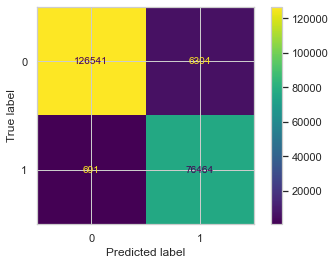

In [304]:
y_logreg_pred = logreg.predict(X_test1)
logreg_cm = confusion_matrix(y_test1, y_logreg_pred)
logreg_cm_display = ConfusionMatrixDisplay(logreg_cm).plot()

In [305]:
#confusion matrix classification report 
print(classification_report(y_test1, y_logreg_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    132845
           1       0.92      0.99      0.96     77155

    accuracy                           0.97    210000
   macro avg       0.96      0.97      0.96    210000
weighted avg       0.97      0.97      0.97    210000



0.9717951013960738


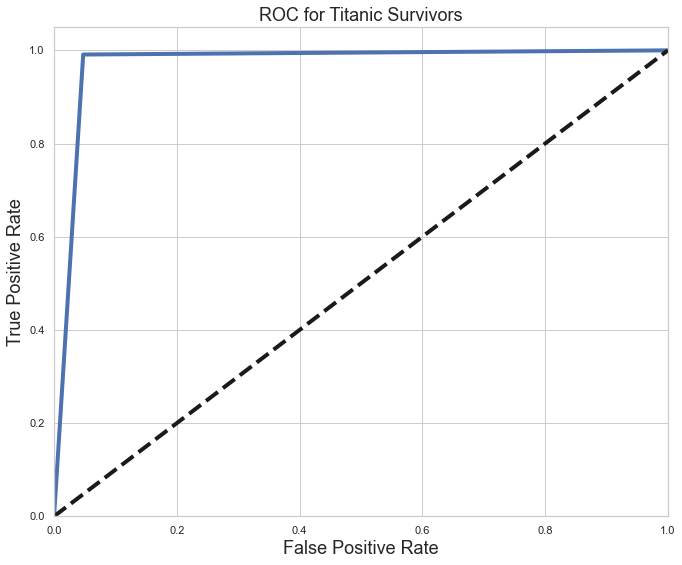

In [306]:
y_logreg_score = logreg.decision_function(X_test1)

FPR_df, TPR_df, _ = roc_curve(y_test1, y_logreg_pred)
ROC_AUC_df = auc(FPR_df, TPR_df)
print(ROC_AUC_df)

plt.figure(figsize = [11,9])
plt.plot(FPR_df, TPR_df, label='ROC curve(area = %0.2f)'%ROC_AUC_df, linewidth = 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic Survivors', fontsize = 18)
plt.show()

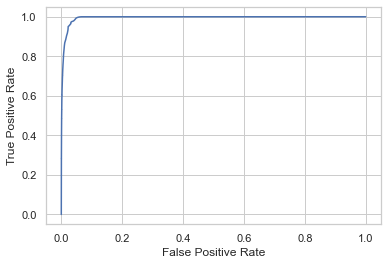

In [307]:
# Already got x_test1(by decision function), use x_test to get y_score in the ROC_curve 
y_logreg_pred = logreg.decision_function(X_test1)

#calculate the false positive rate and true positive rate 
fpr_df, tpr_df, _ = roc_curve(y_test1, y_logreg_pred, pos_label=logreg.classes_[1])

#only show roc curve 
roc_display = RocCurveDisplay(fpr=fpr_df, tpr=tpr_df, ).plot()



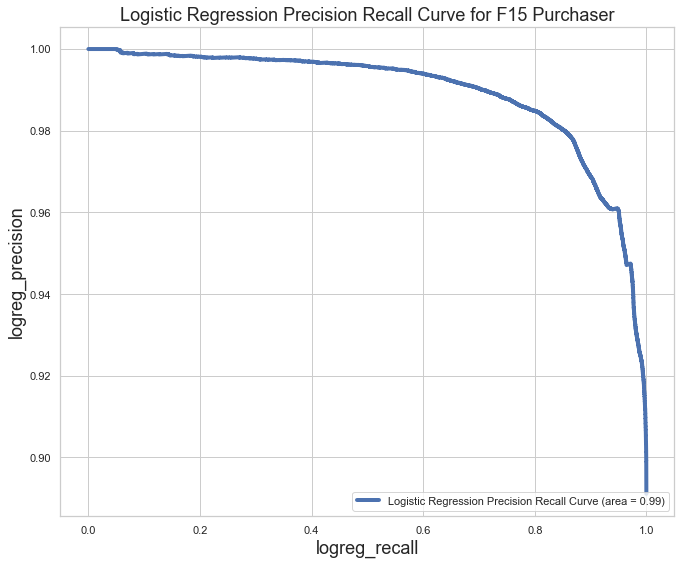

In [308]:
#Calculate the precision rate and recall rate 
precision_df, recall_df, _= precision_recall_curve(y_test1, y_logreg_pred)

#Assign to precision, recall's AUC
df_AUC = auc(recall_df, precision_df)

#Adjusting Curve Figure 
plt.figure(figsize=[11,9])
plt.plot(recall_df, precision_df, label='Logistic Regression Precision Recall Curve (area = %0.2f)' %df_AUC, linewidth=4)
plt.xlabel('logreg_recall', fontsize=18)
plt.ylabel('logreg_precision', fontsize=18)
plt.title('Logistic Regression Precision Recall Curve for F15 Purchaser', fontsize=18)
plt.legend(loc='lower right')
plt.show()


# Deal with Overfitting

We try to reduce the number of features first 


In [309]:
df_data

,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,F10,F09,PS3,PS4,PC,F14M,F13M,F12M,F11M,F10M,F09M
306014,1.2305,0.3165,0.7068,0.0731,1,1,0,0,0,0,0,0,0,0,2.1536,-0.6636,-0.5756,-0.4258,-0.3717,-0.2486
241177,0.6731,-0.2561,3.9911,0.0731,1,0,0,0,0,1,0,0,0,0,-0.6735,-0.6636,-0.5756,-0.4258,-0.0353,-0.2486
613911,1.5625,0.2347,-0.1499,0.8202,1,1,1,0,0,0,0,0,0,0,0.2689,1.4466,-0.5756,-0.4258,-0.3717,-0.2486
590002,1.4112,-0.4811,-0.7211,0.0731,1,0,0,1,0,0,0,0,0,0,-0.6735,-0.6636,0.6910,-0.4258,-0.3717,-0.2486
262362,0.7316,-0.5220,0.9924,0.8202,1,0,1,0,0,1,0,0,0,0,-0.6735,0.0398,-0.5756,-0.4258,-0.0353,-0.2486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699991,-1.2442,-0.3380,-0.8639,-0.6739,0,1,0,0,0,0,0,0,1,0,-0.4379,-0.6636,-0.5756,-0.4258,-0.3717,-0.2486
699992,-0.9717,-0.5220,-0.0071,-0.6739,0,0,0,1,0,0,0,1,0,0,-0.6735,-0.6636,1.9575,-0.4258,-0.3717,-0.2486
699993,1.4127,-0.5220,-0.8639,-0.6739,0,0,0,1,0,0,0,1,0,0,-0.6735,-0.6636,1.9575,-0.4258,-0.3717,-0.2486
699994,-0.4496,-0.4811,-0.1499,-0.6739,0,1,0,0,0,0,0,1,0,0,2.1536,-0.6636,-0.5756,-0.4258,-0.3717,-0.2486


In [310]:
# New df_data1 for overfitting situation 
df_data1 = df_data[['postal_code','day_cnt','fifa_cnt','PS4','PC','PS3','F14','F13','F12','F10','F15']]

#Assign New X and New y 
df_X1 = df_data1.drop(['F15'], axis='columns')
df_y1 = df_data1.F15

#df_data1 splitting 
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_X1,df_y1, test_size= .33, random_state=0)
print('train:', len(X_train2), 'test:',len(X_test2))

train: 468998 test: 231000


In [311]:
# Using Cross-validation (helps reduce variance / expends models predictability)

sc = StandardScaler()

cv = StratifiedShuffleSplit(n_splits=10, test_size = .25, random_state = 0)

column_names = X_train2.columns

x_dt = sc.fit_transform(X_train2)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X_train2, y_train2, cv = cv)

print('Cross-Validation accuracy scores:{}'.format(accuracies))
print('Mean Cross-Validation accuracy score:{}'.format(round(accuracies.mean(),5)))



Cross-Validation accuracy scores:[0.88521109 0.88581663 0.88758209 0.8850661  0.88641365 0.88437527
 0.885629   0.88429851 0.88522814 0.88659275]
Mean Cross-Validation accuracy score:0.88562


In [312]:
#C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases)
##remember effective alpha scores are 0<alpha<infinity 

C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]

#choose a cross validation strategy 
cv = StratifiedShuffleSplit(n_splits=10, test_size= .25)

#setting param for param_grid in GridSearchCV
param = {'C': C_vals}

logreg = LogisticRegression(solver='liblinear')

#calling on GridSearchCV object 
grid = GridSearchCV(estimator=LogisticRegression(),
                   param_grid = param,
                   scoring = 'accuracy',
                   n_jobs = -1,
                   cv = cv)

# fitting the model
grid.fit(X_train2, y_train2)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18]},
             scoring='accuracy')

In [313]:
# getting the best of everything 
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)



0.88623539445629
{'C': 0.2}
LogisticRegression(C=0.2)


In [314]:
#Using the best parameters from the grid-search
logreg_grid = grid.best_estimator_
logreg_grid.score(X_train2,y_train2)

0.8863619887504851

In [315]:
y_logreg_grid_pred = logreg_grid.predict(X_test2)

In [316]:
print(classification_report(y_test2, y_logreg_grid_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    146014
           1       0.85      0.84      0.84     84986

    accuracy                           0.89    231000
   macro avg       0.88      0.88      0.88    231000
weighted avg       0.89      0.89      0.89    231000



0.8772137534632839


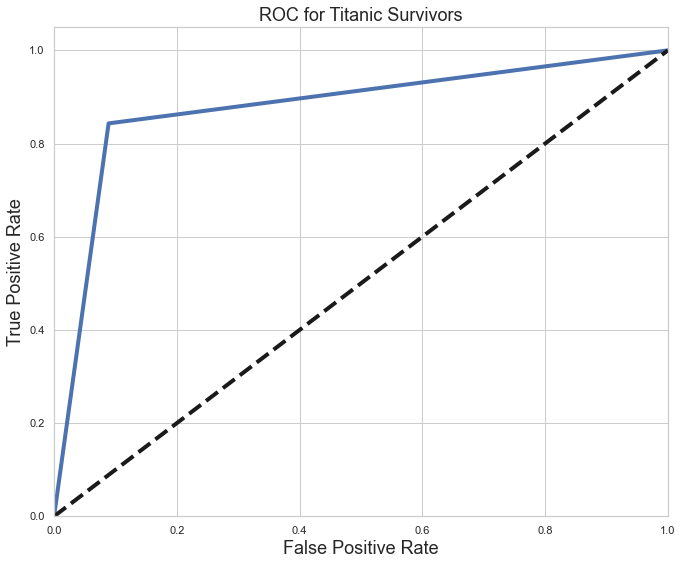

In [317]:
y_logreg_grid_score = logreg_grid.decision_function(X_test2)

FPR_df2, TPR_df2, _ = roc_curve(y_test2, y_logreg_grid_pred)
ROC_AUC_df2 = auc(FPR_df2, TPR_df2)
print(ROC_AUC_df2)

plt.figure(figsize = [11,9])
plt.plot(FPR_df2, TPR_df2, label='ROC curve(area = %0.2f)'%ROC_AUC_df2, linewidth = 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic Survivors', fontsize = 18)
plt.show()

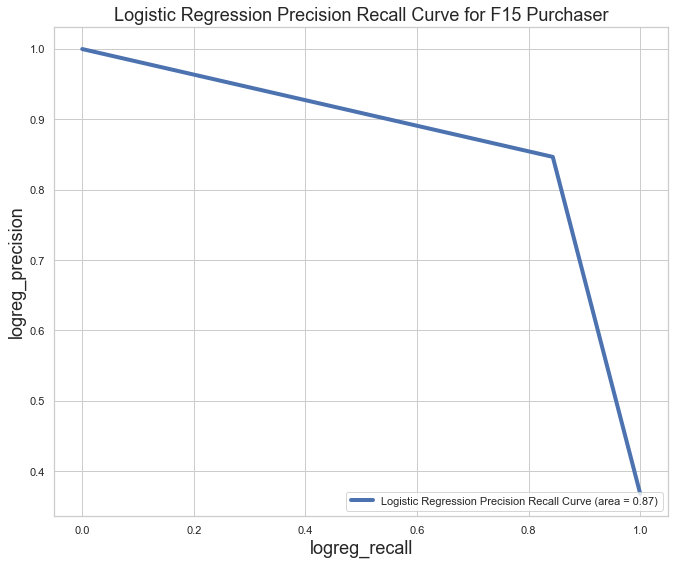

In [318]:
#Calculate the precision rate and recall rate 
precision_df2, recall_df2, _= precision_recall_curve(y_test2, y_logreg_grid_pred)

#Assign to precision, recall's AUC
df_AUC2 = auc(recall_df2, precision_df2)

#Adjusting Curve Figure 
plt.figure(figsize=[11,9])
plt.plot(recall_df2, precision_df2, label='Logistic Regression Precision Recall Curve (area = %0.2f)' %df_AUC2, linewidth=4)
plt.xlabel('logreg_recall', fontsize=18)
plt.ylabel('logreg_precision', fontsize=18)
plt.title('Logistic Regression Precision Recall Curve for F15 Purchaser', fontsize=18)
plt.legend(loc='lower right')
plt.show()

# Random Forests 


In [324]:
df_data1.columns

Index(['postal_code', 'day_cnt', 'fifa_cnt', 'PS4', 'PC', 'PS3', 'F14', 'F13',
       'F12', 'F10', 'F15'],
      dtype='object')

In [325]:
df_data1

,postal_code,day_cnt,fifa_cnt,PS4,PC,PS3,F14,F13,F12,F10,F15
306014,1.2305,0.3165,0.0731,0,0,0,1,0,0,0,1
241177,0.6731,-0.2561,0.0731,0,0,0,0,0,0,1,1
613911,1.5625,0.2347,0.8202,0,0,0,1,1,0,0,1
590002,1.4112,-0.4811,0.0731,0,0,0,0,0,1,0,1
262362,0.7316,-0.5220,0.8202,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
699991,-1.2442,-0.3380,-0.6739,1,0,0,1,0,0,0,0
699992,-0.9717,-0.5220,-0.6739,0,0,1,0,0,1,0,0
699993,1.4127,-0.5220,-0.6739,0,0,1,0,0,1,0,0
699994,-0.4496,-0.4811,-0.6739,0,0,1,1,0,0,0,0


In [326]:
#Looking for best k 
for k in ('gini','entropy'):
    rf_model3 = RandomForestClassifier(criterion=k).fit(X_train2, y_train2)
    rf_yhat3 = rf_model3.predict(X_test2)
    rf_y_prob3 = rf_model3.predict_proba(X_test2)
    print("When Solver is {}, logloss is: {}".format(k, log_loss(y_test2, rf_y_prob3)))

When Solver is gini, logloss is: 0.2687844656211784
When Solver is entropy, logloss is: 0.2733023689714708


In [327]:
# k = entropy 
# n_estimators = 1000 
# random_state=42

rf_model3 = RandomForestClassifier(n_estimators = 1000, random_state = 42, criterion='entropy').fit(X_train2, y_train2)

In [328]:
# prediction on the test set 
y_rf_pred = rf_model3.predict(X_test2)

In [329]:
#calculate random forests's precision, recall, and F1-score 
print(classification_report(y_test2, y_rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96    146014
           1       0.92      0.94      0.93     84986

    accuracy                           0.95    231000
   macro avg       0.95      0.95      0.95    231000
weighted avg       0.95      0.95      0.95    231000



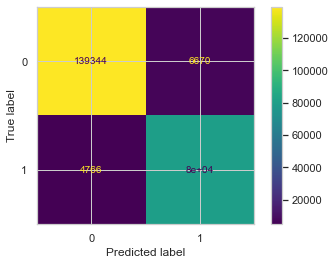

In [330]:
rf_cm = confusion_matrix(y_test2, y_rf_pred)
rf_cm_display = ConfusionMatrixDisplay(rf_cm).plot()

In [331]:
# Calculate the absolute errors
errors = abs(y_rf_pred - y_test2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [332]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test2)

# Calculate and display accuracy
rf_accuracy = 100 - np.mean(mape)
print('Accuracy:', round(rf_accuracy, 2), '%.')

Accuracy: -inf %.


In [333]:
tree = rf_model3.estimators_[5]
tree

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1201263687)

In [334]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 51


In [335]:
#random forests ROC & AUC

#calculated the value of rf roc score 
rf_roc_auc = roc_auc_score(y_test2, rf_model3.predict(X_test2))
print(rf_roc_auc)

0.9491198119538189


<Figure size 432x288 with 0 Axes>

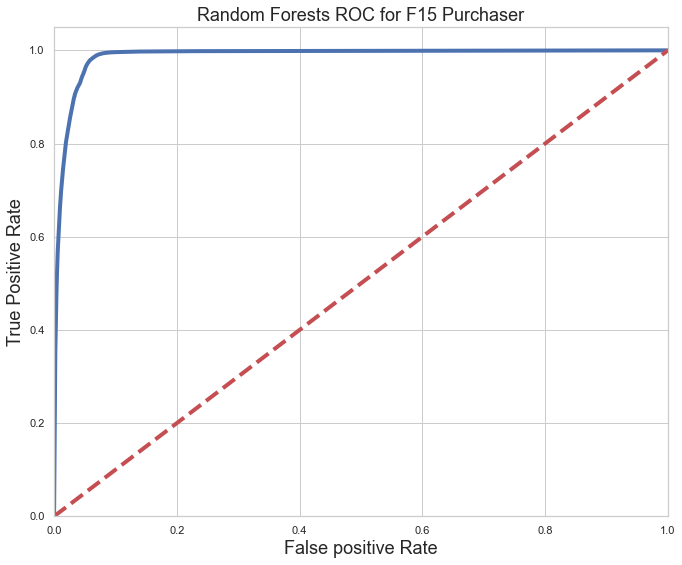

In [336]:
#Compute ROC curve and ROC area for each class 
FPR_rf, TPR_rf, _ = roc_curve(y_test2,rf_model3.predict_proba(X_test2)[:,1])
#present the figure 
plt.figure()
#adjusting curve figure 
plt.figure(figsize=[11,9])
plt.plot(FPR_rf, TPR_rf, label='Random Forest ROC curve (area= %0.2f)'%rf_roc_auc, linewidth=4)
plt.plot([0,1],[0,1],'r--',linewidth=4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forests ROC for F15 Purchaser', fontsize=18)
plt.show()

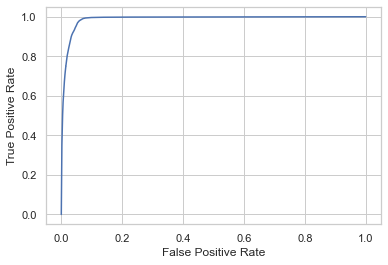

In [337]:
#calculate the false positive rate and true positive rate 
fpr_rf, tpr_rf, _ = roc_curve(y_test2, rf_model3.predict_proba(X_test2)[:,1], pos_label=rf_model3.classes_[1])
#only show roc curve 
rf_roc_display = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, ).plot()

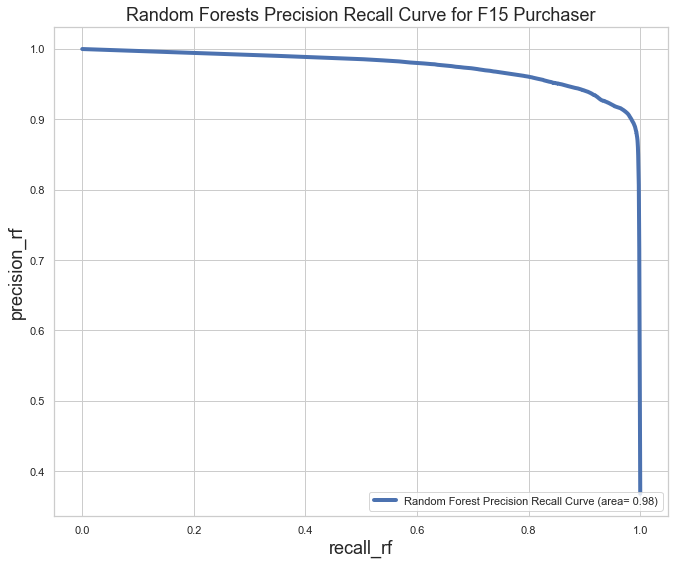

In [338]:
#calculate the precision rate and recall rate 
precision_rf, recall_rf, _ = precision_recall_curve(y_test2, rf_model3.predict_proba(X_test2)[:,1])
#assign to precision, recall's AUC 
rf_PR_AUC = auc(recall_rf, precision_rf)
#adjusting curve figure 
plt.figure(figsize=[11,9])
plt.plot(recall_rf, precision_rf, label='Random Forest Precision Recall Curve (area= %0.2f)'%rf_PR_AUC,linewidth=4)
plt.xlabel('recall_rf', fontsize=18)
plt.ylabel('precision_rf', fontsize=18)
plt.title('Random Forests Precision Recall Curve for F15 Purchaser', fontsize=18)
plt.legend(loc='lower right')
plt.show()

# Gaussian Naive Bayes 

- Bayes' Theorem for predictive modeling 

In [340]:
#create gaussianNB object 
gaussianmodel = GaussianNB()
#train the model using the training sets 
gaussianmodel.fit(X_train2, y_train2)
#prediction on the test set 
y_gaussian_pred = gaussianmodel.predict(X_test2)

In [341]:
#GNB report 
print(classification_report(y_test2,y_gaussian_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84    146014
           1       0.76      0.59      0.66     84986

    accuracy                           0.78    231000
   macro avg       0.77      0.74      0.75    231000
weighted avg       0.78      0.78      0.77    231000



In [342]:
#GNB confusion matrix 
pd.DataFrame(confusion_matrix(y_test2, y_gaussian_pred),\
            columns=['Predicted not_purchased','Predicted purchased'],\
            index=['Not_purchased','Purchased'])


,Predicted not_purchased,Predicted purchased
Not_purchased,129841,16173
Purchased,34692,50294


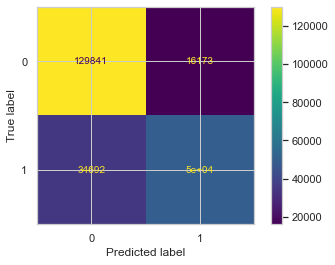

In [343]:
#calculate confusion matrix 
gaussian_cm = confusion_matrix(y_test2, y_gaussian_pred)
#present gaussian naiv confusion matrix 
gaussian_cm_display = ConfusionMatrixDisplay(gaussian_cm).plot()

0.7405141188717392


<Figure size 432x288 with 0 Axes>

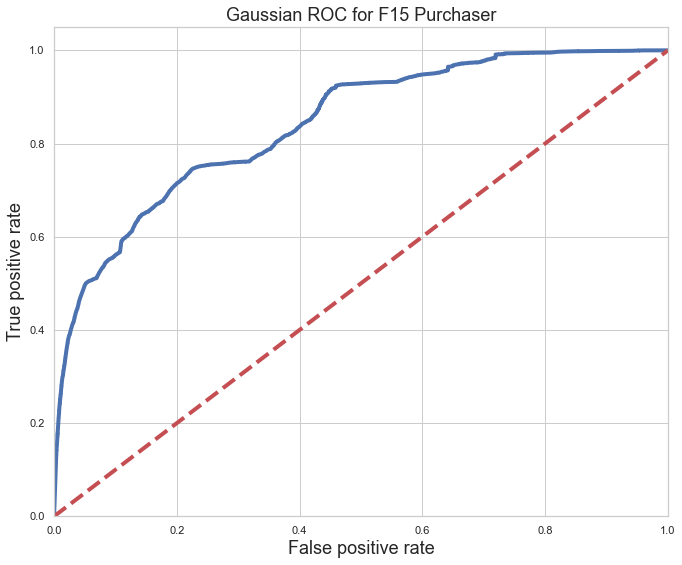

In [344]:
#GNB ROC&AUC
gaussian_roc_auc = roc_auc_score(y_test2, y_gaussian_pred)
print(gaussian_roc_auc)

#compute ROC curve and ROC area for each class 
FPR_gaussian, TPR_gaussian, _ = roc_curve(y_test2, gaussianmodel.predict_proba(X_test2)[:,1])
plt.figure()

#adjusting curve figure 
plt.figure(figsize=[11,9])
plt.plot(FPR_gaussian, TPR_gaussian, label='Gaussian ROC curve(area= %0.2f)'%gaussian_roc_auc, linewidth=4)
plt.plot([0,1],[0,1],'r--',linewidth=4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate', fontsize=18)
plt.ylabel('True positive rate', fontsize=18)
plt.title('Gaussian ROC for F15 Purchaser', fontsize=18)
plt.show()

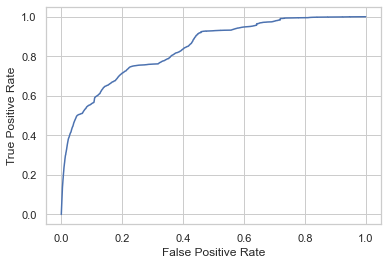

In [345]:
fpr_gaussian, tpr_gaussian, _=roc_curve(y_test2, gaussianmodel.predict_proba(X_test2)[:,1],pos_label=gaussianmodel.classes_[1])
gaussian_roc_display = RocCurveDisplay(fpr=fpr_gaussian, tpr=tpr_gaussian,).plot()

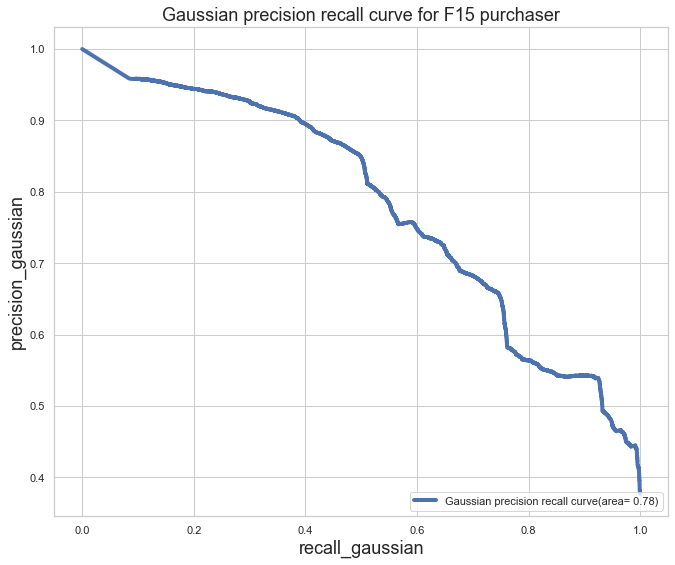

In [346]:
precision_gaussian, recall_gaussian, _=precision_recall_curve(y_test2, gaussianmodel.predict_proba(X_test2)[:,1])
Gaussian_PR_AUC = auc(recall_gaussian, precision_gaussian)

#adjusting curve figure 
plt.figure(figsize=[11,9])
plt.plot(recall_gaussian, precision_gaussian, label='Gaussian precision recall curve(area= %0.2f)' %Gaussian_PR_AUC, linewidth=4)
plt.xlabel('recall_gaussian', fontsize=18)
plt.ylabel('precision_gaussian', fontsize=18)
plt.title('Gaussian precision recall curve for F15 purchaser', fontsize=18)
plt.legend(loc='lower right')
plt.show()



# Decision Tree 

In [358]:
#finding the best max_depth 
for d in range(1,10):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = d).fit(X_train2, y_train2)
    y_dt_pred = clf.predict(X_test2)
    print(d, metrics.accuracy_score(y_test2, y_dt_pred))

1 0.7593030303030303
2 0.7814718614718614
3 0.8309004329004329
4 0.8767359307359307
5 0.910051948051948
6 0.9201601731601732
7 0.9351948051948052
8 0.940965367965368
9 0.9483506493506494


In [359]:
# when k = 9, y_dt_pred is 0.948
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)
#train decision tree classifer 
clf = clf.fit(X_train2, y_train2)
#predict the response for test dataset 
y_dt_pred = clf.predict(X_test2)

In [360]:
# classification report 
print(classification_report(y_test2, y_dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    146014
           1       0.90      0.96      0.93     84986

    accuracy                           0.95    231000
   macro avg       0.94      0.95      0.95    231000
weighted avg       0.95      0.95      0.95    231000



In [361]:
#confusion matrix 
pd.DataFrame(confusion_matrix(y_test2, y_dt_pred),\
            columns=['Predicted not_purchased', 'Predicted purchased'],\
            index=['Not_purchased','Purchased'])

,Predicted not_purchased,Predicted purchased
Not_purchased,137138,8876
Purchased,3054,81932


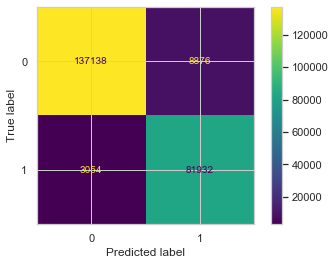

In [362]:
#present confusion matrix 
dt_cm = confusion_matrix(y_test2, y_dt_pred)
dt_cm_display = ConfusionMatrixDisplay(dt_cm).plot()

In [363]:
#DT ROC & AUC 
dt_roc_auc = roc_auc_score(y_test2, clf.predict(X_test2))
print(dt_roc_auc)

0.9516379889898182


<Figure size 432x288 with 0 Axes>

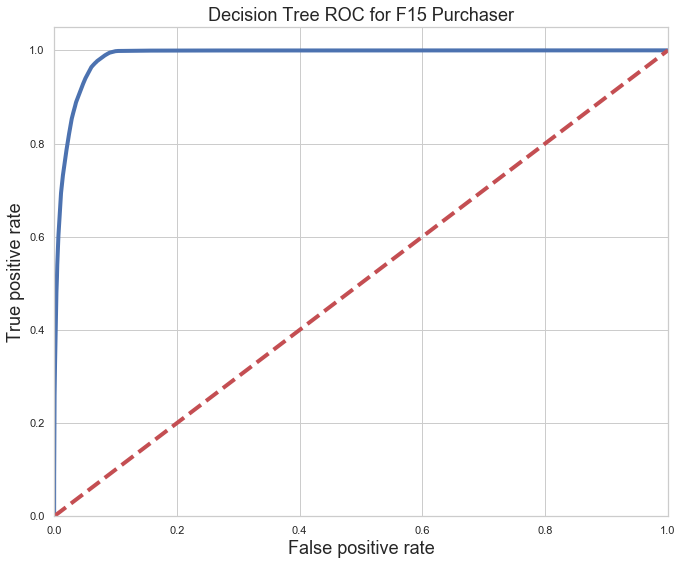

In [364]:
FPR_dt, TPR_dt, _ = roc_curve(y_test2, clf.predict_proba(X_test2)[:,1])
plt.figure()

plt.figure(figsize=[11,9])
plt.plot(FPR_dt, TPR_dt, label='Decision Tree ROC curve(area= %0.2f)'%dt_roc_auc,linewidth=4)
plt.plot([0,1],[0,1],'r--',linewidth=4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate', fontsize=18)
plt.ylabel('True positive rate', fontsize=18)
plt.title('Decision Tree ROC for F15 Purchaser', fontsize=18)
plt.show()

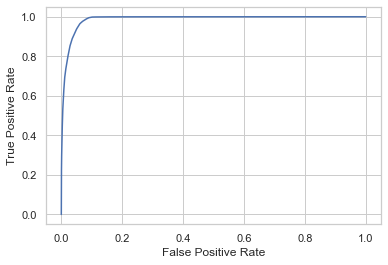

In [365]:
fpr_dt, tpr_dt, _ = roc_curve(y_test2, clf.predict_proba(X_test2)[:,1],pos_label=clf.classes_[1])
dt_roc_display = RocCurveDisplay(fpr=fpr_dt, tpr=tpr_dt, ).plot()

In [366]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


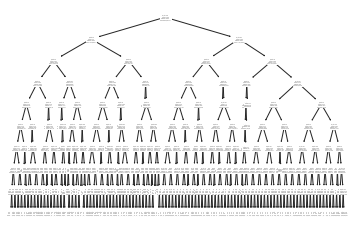

In [367]:
tree.plot_tree(clf)
plt.show()

# Extra Trees Classifier

In [380]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)

In [381]:
extra_tree_forest.fit(X_train2, y_train2)

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5)

In [382]:
y_ExtraTreesClassifier_pred = extra_tree_forest.predict(X_test2)

In [383]:
#calculate random forests's precision, recall, and F1-score 
print(classification_report(y_test2, y_ExtraTreesClassifier_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    146014
           1       0.92      0.93      0.93     84986

    accuracy                           0.95    231000
   macro avg       0.94      0.94      0.94    231000
weighted avg       0.95      0.95      0.95    231000



In [384]:
#ETC confision matrix 
pd.DataFrame(confusion_matrix(y_test2, y_ExtraTreesClassifier_pred),\
                             columns=['Predicted not_purchased', 'Predicted purchased'],\
                             index=['Not_purchased','Purchased'])

,Predicted not_purchased,Predicted purchased
Not_purchased,139414,6600
Purchased,5981,79005


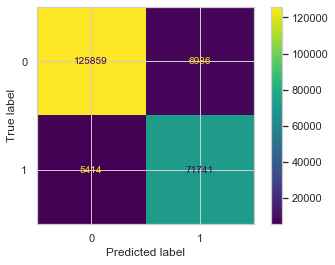

In [ ]:
ExtraTreesClassifier_cm = confusion_matrix(Y_test1, y_ExtraTreesClassifier_pred)
ExtraTreesClassifier_cm_display = ConfusionMatrixDisplay(ExtraTreesClassifier_cm).plot()

In [386]:
#ETC ROC & AUC
etc_roc_auc = roc_auc_score(y_test2, extra_tree_forest.predict(X_test2))
print(etc_roc_auc)

0.9422112788159162


In [387]:
# Computing the importance of each feature
feature_importance_testing = extra_tree_forest.feature_importances_

In [388]:

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

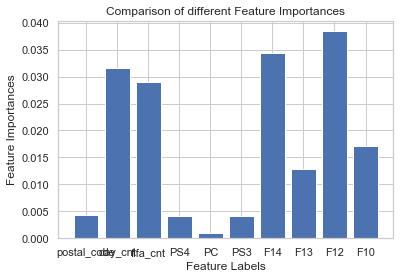

In [389]:

# Plotting a Bar Graph to compare the models
plt.bar(X_train2.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

# Gradient Boosting Classifier 

In [390]:
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train2, y_train2)
y_gradient_pred = gradient_boost.predict(X_test2)

In [391]:
print(classification_report(y_test2, y_gradient_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97    146014
           1       0.92      0.96      0.94     84986

    accuracy                           0.96    231000
   macro avg       0.95      0.96      0.95    231000
weighted avg       0.96      0.96      0.96    231000



In [392]:
pd.DataFrame(confusion_matrix(y_test2, y_gradient_pred),\
            columns=['Predicted not_purchased','Predicted purchased'],\
            index=['Not_purchased','Purchased'])

,Predicted not_purchased,Predicted purchased
Not_purchased,139231,6783
Purchased,3298,81688


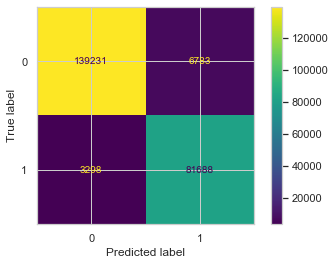

In [393]:
gradient_cm=confusion_matrix(y_test2, y_gradient_pred)
gradient_cm_display=ConfusionMatrixDisplay(gradient_cm).plot()

In [394]:
gradient_roc_auc=roc_auc_score(y_test2, y_gradient_pred)
print(gradient_roc_auc)

0.9573695793928476


In [396]:
#Adjust GBDT parameters to improve the generalization ability of the model
#Firstly, we discuss the learning rate and n estimators

param_test1 = {'n_estimators':range(20,81,10)}
gsearch1=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                                min_samples_leaf=20, max_features='sqrt',subsample=0.8,
                                                 random_state=10),
                      param_grid=param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(X_train2, y_train2)
gsearch1.cv_results_,gsearch1.best_params_, gsearch1.best_score_
          

({'mean_fit_time': array([ 5.6983788 ,  7.89357252, 10.3075376 , 12.79686475, 15.07212143,
         17.35324769, 19.77902222]),
  'std_fit_time': array([0.72449726, 0.07802004, 0.13562614, 0.19777241, 0.20595899,
         0.06715164, 0.13980315]),
  'mean_score_time': array([0.10442872, 0.13972797, 0.16383142, 0.18781395, 0.24687047,
         0.23193398, 0.26123662]),
  'std_score_time': array([0.00829889, 0.0042983 , 0.006783  , 0.00419959, 0.06489029,
         0.00365282, 0.01556304]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.96327187, 0.97260046, 0.97771368, 0.97980526, 0.98293765,
         0.98439391, 0.98545541]),

From the above information, we know the best 'n_estimators' is 80' 

In [397]:
#we search for the maximum depth of the decision tree: "Max_depth" and the minimum number of samples: "min_samples_split"

param_test2={'max_depth':range(3,14,2),'min_samples_split':range(100,801,200)}
gsearch2=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, min_samples_leaf=20,
                                                          max_features='sqrt',subsample=0.8,random_state=10),
                     param_grid=param_test2, scoring='roc_auc',cv=5)
gsearch2.fit(X_train2, y_train2)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([  38.4610086 ,   50.29823904,  304.31906557,  442.92673745,
          529.51076851,  964.1330802 , 2469.22807417, 3133.97736635,
           80.10619707,   77.83851418,   77.42875795,   75.86458979,
          101.34503512,   97.0494318 ,   93.94702187,   77.55540285,
           69.11544938,   78.45674963,   65.32627058,   80.35079288,
           95.38652725,   79.06550632,   76.68831601,   76.02813215]),
  'std_fit_time': array([  27.2123205 ,   10.5944488 ,  516.97827094,  488.95566579,
          593.02336328, 1050.8547262 , 1557.93037707, 1477.75319262,
            4.84525572,    3.21970509,    3.10860398,    3.8290955 ,
            2.90694109,    3.25683188,    2.38398853,   21.6936901 ,
            0.66594953,   31.75470345,    7.81781478,   34.36092415,
            4.50003891,    1.82021719,    1.56520706,    2.48390316]),
  'mean_score_time': array([0.25030341, 4.55063906, 0.67997522, 0.54147305, 1.1839376 ,
         1.13972883, 1.01549282, 1.20944777, 1.

In [398]:
param_test3={'min_samples_leaf':range(60,101,10)}
gsearch3=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_depth=9, min_samples_split=700,
                                                          max_features='sqrt',subsample=0.8,random_state=10),
                     param_grid=param_test3,scoring='roc_auc',cv=5)
gsearch3.fit(X_train2,y_train2)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([296.80257416,  41.11953602,  43.71092238,  47.09983015,
          46.34839759]),
  'std_fit_time': array([498.58169209,   0.60198783,   1.87146118,   1.11994114,
           0.39699256]),
  'mean_score_time': array([ 0.57400312, 49.88220215,  0.53504858,  0.57195835,  0.55939283]),
  'std_score_time': array([ 0.04090619, 98.76190163,  0.01435166,  0.03014741,  0.0234233 ]),
  'param_min_samples_leaf': masked_array(data=[60, 70, 80, 90, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_leaf': 60},
   {'min_samples_leaf': 70},
   {'min_samples_leaf': 80},
   {'min_samples_leaf': 90},
   {'min_samples_leaf': 100}],
  'split0_test_score': array([0.99199888, 0.99199871, 0.99192869, 0.99198544, 0.99197302]),
  'split1_test_score': array([0.99170741, 0.99176541, 0.9917248 , 0.99172183, 0.991707  ]),
  'split2_test_score': array([0.99185551, 0.99184819, 0.99182618, 0.99177702,

In [400]:
#max_features 
param_test4={'max_features':range(5,10,2)}
gsearch4=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_depth=9, min_samples_split=700, min_samples_leaf=70,
                                                          subsample=0.8, random_state=10),
                                                                 param_grid=param_test4, scoring='roc_auc',cv=5)
gsearch4.fit(X_train2, y_train2)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([ 74.25705414,  83.44808011, 183.02209029]),
  'std_fit_time': array([11.89298913,  1.64834482, 83.72801748]),
  'mean_score_time': array([0.54977221, 0.57475948, 1.53394871]),
  'std_score_time': array([0.00888412, 0.0325741 , 1.21846337]),
  'param_max_features': masked_array(data=[5, 7, 9],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 5}, {'max_features': 7}, {'max_features': 9}],
  'split0_test_score': array([0.99201031, 0.99195656, 0.9919758 ]),
  'split1_test_score': array([0.99175818, 0.99175944, 0.99172518]),
  'split2_test_score': array([0.99182336, 0.99181324, 0.99181066]),
  'split3_test_score': array([0.99192553, 0.99194805, 0.99193547]),
  'split4_test_score': array([0.99207105, 0.99205781, 0.9920594 ]),
  'mean_test_score': array([0.99191769, 0.99190702, 0.9919013 ]),
  'std_test_score': array([0.00011533, 0.00010719, 0.00011912]),
  'rank_test_score': array([1, 2, 3

In [401]:
#subsample
param_test5={'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,n_estimators=80, max_depth=9, min_samples_leaf=70,
                                                          min_samples_split=700,subsample=0.8, random_state=10, max_features=5),
                                                                 param_grid=param_test5, scoring='roc_auc',cv=5)
gsearch5.fit(X_train2, y_train2)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_



({'mean_fit_time': array([148.14286928,  60.83455462,  59.6070406 ,  63.23187742,
         515.93646708,  63.27554879]),
  'std_fit_time': array([ 51.42044735,  11.50260444,   1.32271786,   1.2092505 ,
         910.96904097,   3.10579558]),
  'mean_score_time': array([1.74056487, 0.5402832 , 0.52875843, 0.53947477, 0.98389316,
         0.55511088]),
  'std_score_time': array([0.88357414, 0.02563378, 0.01355279, 0.01309191, 0.94109012,
         0.01828863]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}],
  'split0_test_score': array([0.99196116, 0.99196316, 0.99198517, 0.99201031, 0.99200363,
         0.99202182]),
  'split1_test_score': array([0.99168206, 0.99172444, 0.99172935, 0.99175818, 0.991

In [402]:
#subsample = 0.85
#max_features= 5
#min_samples_leaf = 70
#max_depth= 9, min_samples_split= 700
#n_estimators = 80

# put all new GBDT parameters into the model 
gbm1=GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_depth=9, min_samples_leaf=70,
                               min_samples_split=700, max_features='sqrt',subsample=0.85, random_state=10)
gbm1.fit(X_train2, y_train2)
y_gbm1_pred=gbm1.predict(X_test2)

In [403]:
print(classification_report(y_test2,y_gbm1_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    146014
           1       0.93      0.97      0.95     84986

    accuracy                           0.96    231000
   macro avg       0.96      0.96      0.96    231000
weighted avg       0.96      0.96      0.96    231000



After 6 parameters were adjusted, the accuracy did not change. 
Each of them, Precision, recall, and F1-score, has increased 0.01 

In [404]:
gradient_roc_auc1=roc_auc_score(y_test2, y_gbm1_pred)
print(gradient_roc_auc1)

0.9629539546669026


# eXtreme Gradient Boosting Classifier 

In [405]:
# EGBC can use 6 parameters from Gradient Boosting Classifier 

# subsample = 0.85
# max_features= 5
# min_samples_leaf = 70
# max_depth= 9, min_samples_split= 700
# n_estimators = 80

XGBClassifier = XGBClassifier(learning_rate=0.1,n_estimators=80,max_depth=9,
                        subsample=0.9,objective='binary:logistic', random_state=10)

XGBClassifier.fit(X_train2, y_train2)

y_XGBClassifier_pred = XGBClassifier.predict(X_test2)



In [406]:
print(classification_report(y_test2, y_XGBClassifier_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    146014
           1       0.93      0.97      0.95     84986

    accuracy                           0.96    231000
   macro avg       0.95      0.96      0.96    231000
weighted avg       0.96      0.96      0.96    231000



In [407]:
XGBClassifier_roc_auc = roc_auc_score(y_test2, y_XGBClassifier_pred)
print(XGBClassifier_roc_auc)

0.9632942610076209


# K-nearest Neighbor Classifier(KNN)

In [408]:
#initialize 2 empty lists(K/validation) to store the value of K and validation score 
#initialize 1 empty dictionary(scores) to store the k: validation_score(key:value) pairs
K = []
validation = []
scores = {}

#the for loop will test k values from 1 to 20 
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2, y_train2)
    
#compute accuracy by applying the model on the test set 
validation_score = knn.score(X_test2, y_test2)

#adds a single item(k value) to the list 
K.append(k)

validation.append(validation_score)

#a dictionary holds key:value pairs 
#store the validation score for each value of k(k is the key)
scores[k] = [validation_score]
#print the key: value pairs in scores
for keys, values in scores.items():
    print(keys, ':', values)
    

30 : [0.9482900432900433]


In [409]:
# Grid search on KNN classifier 

#k_range = range(30)

weights_options = ['uniform', 'distance']

param = {'n_neighbors': [30], 'weights': weights_options}

#using startifiedShufflesplit
cv_knn = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

#estimator = knn, param_grid = param, n_jobs=-1 to instruct scikit learn to use all available processors
grid_knn = GridSearchCV(KNeighborsClassifier(), param, cv=cv, verbose=False, n_jobs=-1)

#fitting the model
grid_knn.fit(X_train2, y_train2)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [30],
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [410]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

0.9475539445628998
{'n_neighbors': 30, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=30, weights='distance')


In [411]:
#using the best parameters from the grid-search 
knn_grid = grid_knn.best_estimator_
knn_grid.score(X_train2, y_train2)

0.9987761141838558

In [412]:
y_knn_pred = knn_grid.predict(X_test2)

In [414]:
knn_cm=confusion_matrix(y_test2, y_knn_pred)
knn_cm

array([[139582,   6432],
       [  5140,  79846]])

In [415]:
print(classification_report(y_test2, y_knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    146014
           1       0.93      0.94      0.93     84986

    accuracy                           0.95    231000
   macro avg       0.94      0.95      0.95    231000
weighted avg       0.95      0.95      0.95    231000



In [416]:
knn_roc_auc=roc_auc_score(y_test2, y_knn_pred)
print(knn_roc_auc)

0.9477344398845778


# Bagging_classifier 

In [417]:
n_estimators = [10,30,50,70,80,150,160,170,175,180,185]
# cross validation for sampling  
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

In [418]:
parameters = {'n_estimators':n_estimators,}

In [419]:
grid = GridSearchCV(BaggingClassifier(base_estimator=None, bootstrap_features=False),param_grid=parameters, cv=cv, n_jobs=-1)

In [420]:
grid.fit(X_train2, y_train2)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [421]:
y_grid_pred = grid.predict(X_test2)

In [422]:
print(classification_report(y_test2, y_grid_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96    146014
           1       0.92      0.95      0.94     84986

    accuracy                           0.95    231000
   macro avg       0.95      0.95      0.95    231000
weighted avg       0.95      0.95      0.95    231000



In [423]:
grid_roc_auc = roc_auc_score(y_test2, y_grid_pred)
print(grid_roc_auc)

0.9520150259812356


# Support Vector Machines(SVM) 

In [424]:
#k in different kernel 
for k in ('linear','poly','rbf','sigmoid'):
    svm_clf = svm.SVC(kernel=k).fit(X_train2, y_train2)
    svm_yhat = svm_clf.predict(X_test2)
    print("For kernel:{}, the f1 score is: {}".format(k,f1_score(y_test2, svm_yhat, average='weighted')))

For kernel:linear, the f1 score is: 0.8787746951415698
For kernel:poly, the f1 score is: 0.9095690597205612
For kernel:rbf, the f1 score is: 0.9377527892910746
For kernel:sigmoid, the f1 score is: 0.7040649713502694


In [425]:
SVM_clf = svm.SVC(kernel='rbf')
SVM_clf.fit(X_train2, y_train2)

SVC()

In [426]:
SVMyhat = SVM_clf.predict(X_test2)
SVMyhat [0:5]

array([0, 0, 0, 1, 0])

In [427]:
print(classification_report(y_test2,SVMyhat))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    146014
           1       0.93      0.90      0.91     84986

    accuracy                           0.94    231000
   macro avg       0.94      0.93      0.93    231000
weighted avg       0.94      0.94      0.94    231000



In [428]:
svm_roc_auc = roc_auc_score(y_test2, SVMyhat)
print(svm_roc_auc)

0.9294646323103192


In [429]:
pd.DataFrame(confusion_matrix(y_test2, SVMyhat),\
                             columns=['Predicted not_purchased', 'Predicted purchased'],\
                             index=['Not_purchased','Purchased'])

,Predicted not_purchased,Predicted purchased
Not_purchased,140437,5577
Purchased,8743,76243


0.9294646323103192


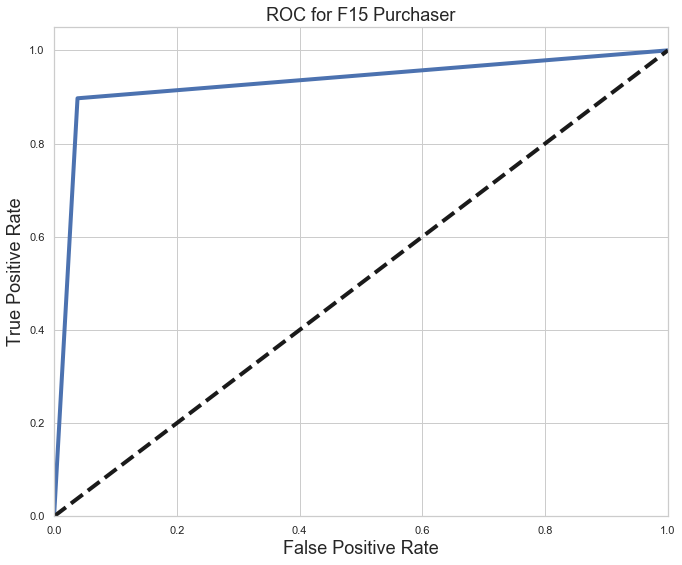

In [432]:
#calculated the value of y_score by decision_function(X_test) is used in the roc_curve function
y_svm = SVM_clf.decision_function(X_test2) 

#Compute ROC curve and ROC area for each class
FPR_svm, TPR_svm, _ = roc_curve(y_test2, SVMyhat) #Calculate the true positive rate and false positive rate
ROC_AUC_svm = auc(FPR_svm, TPR_svm) #Calculate the value of auc
print (ROC_AUC_svm)

#Adjusting Curve Figure 
plt.figure(figsize =[11,9])
plt.plot(FPR_svm, TPR_svm, label= 'ROC curve(area = %0.2f)'%ROC_AUC_svm, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for F15 Purchaser', fontsize= 18)
plt.show()

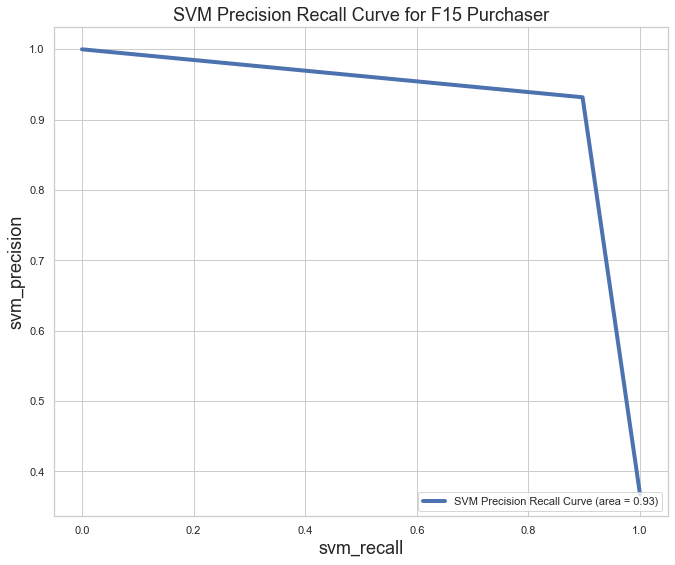

In [431]:
y_svm = SVM_clf.decision_function(X_test2) ##Already got X_test (By decision function), uset X_test to get y_score in the roc_curve function

svm_precision, svm_recall, _ = precision_recall_curve(y_test2, SVMyhat) #Calculate the precision rate and recall rate
PR_AUC = auc(svm_recall, svm_precision) # Assign to Precision, Recall's AUC 

#Adjusting Curve Figure 
plt.figure(figsize=[11,9]) 
plt.plot(svm_recall, svm_precision, label='SVM Precision Recall Curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('svm_recall', fontsize=18)
plt.ylabel('svm_precision', fontsize=18)
plt.title('SVM Precision Recall Curve for F15 Purchaser', fontsize=18)
plt.legend(loc="lower right")
plt.show()


# Compare Models and Algorithms

In [436]:
#Lostic Regression 
#when solver='liblinear', C=0.2
y_logreg_grid_pred = logreg_grid.predict(X_test2)
jc1 = jaccard_score(y_test2, y_logreg_grid_pred, average=None)
fs1 = f1_score(y_test2, y_logreg_grid_pred, average='weighted')
rc1 = recall_score(y_test2,y_logreg_grid_pred, average='weighted')
acc1 = accuracy_score(y_test2, y_logreg_grid_pred)
roc_auc_score1 = roc_auc_score(y_test2, y_logreg_grid_pred)

#Random Forest 
# k = entropy 
# n_estimators = 1000 
# random_state=42
y_rf_pred = rf_model3.predict(X_test2)
jc2 = jaccard_score(y_test2, y_rf_pred, average=None)
fs2 = f1_score(y_test2, y_rf_pred, average='weighted')
rc2 = recall_score(y_test2,y_rf_pred, average='weighted')
acc2 = accuracy_score(y_test2, y_rf_pred)
roc_auc_score2 = roc_auc_score(y_test2, y_rf_pred)

#Gaussian Naive Bayes 
y_gaussian_pred = gaussianmodel.predict(X_test2)
jc3 = jaccard_score(y_test2, y_gaussian_pred, average=None)
fs3 = f1_score(y_test2, y_gaussian_pred, average='weighted')
rc3 = recall_score(y_test2,y_gaussian_pred, average='weighted')
acc3 = accuracy_score(y_test2, y_gaussian_pred)
roc_auc_score3 = roc_auc_score(y_test2, y_gaussian_pred)

# Decision Tree
#criterion='entropy'
#max_depth=9
y_dt_pred = clf.predict(X_test2)
jc4 = jaccard_score(y_test2, y_dt_pred, average=None)
fs4 = f1_score(y_test2, y_dt_pred, average='weighted')
rc4 = recall_score(y_test2,y_dt_pred, average='weighted')
acc4 = accuracy_score(y_test2, y_dt_pred)
roc_auc_score4 = roc_auc_score(y_test2, y_dt_pred)

# Extra Trees Classifier 
#n_estimators = 5,
#criterion ='entropy', 
#max_features = 2
y_ExtraTreesClassifier_pred = extra_tree_forest.predict(X_test2)
jc5 = jaccard_score(y_test2, y_ExtraTreesClassifier_pred, average=None)
fs5 = f1_score(y_test2, y_ExtraTreesClassifier_pred, average='weighted')
rc5 = recall_score(y_test2, y_ExtraTreesClassifier_pred, average='weighted')
acc5 = accuracy_score(y_test2, y_ExtraTreesClassifier_pred)
roc_auc_score5 = roc_auc_score(y_test2, y_ExtraTreesClassifier_pred)

# Gradient Boosting Classifier 
#subsample = 0.85
#max_features= 5
#min_samples_leaf = 70
#max_depth= 9
#min_samples_split= 700
#n_estimators = 80
y_gbm1_pred=gbm1.predict(X_test2)
jc6 = jaccard_score(y_test2, y_gbm1_pred, average=None)
fs6 = f1_score(y_test2, y_gbm1_pred, average='weighted')
rc6 = recall_score(y_test2, y_gbm1_pred, average='weighted')
acc6 = accuracy_score(y_test2, y_gbm1_pred)
roc_auc_score6 = roc_auc_score(y_test2, y_gbm1_pred)

#eXtreme Gradient Boosting Classifier 
#learning_rate=0.1,
#n_estimators=80
#max_depth=9,
#subsample=0.9,
#objective='binary:logistic', 
#random_state=10
y_XGBClassifier_pred = XGBClassifier.predict(X_test2)
jc7 = jaccard_score(y_test2, y_XGBClassifier_pred, average=None)
fs7 = f1_score(y_test2, y_XGBClassifier_pred, average='weighted')
rc7 = recall_score(y_test2, y_XGBClassifier_pred, average='weighted')
acc7 = accuracy_score(y_test2, y_XGBClassifier_pred)
roc_auc_score7 = roc_auc_score(y_test2, y_XGBClassifier_pred)

#KNN
#n_neighbors=30, 
#weights='distance'
y_knn_pred = knn_grid.predict(X_test2)
jc8 = jaccard_score(y_test2, y_knn_pred, average=None)
fs8 = f1_score(y_test2, y_knn_pred, average='weighted')
rc8 = recall_score(y_test2, y_knn_pred, average='weighted')
acc8 = accuracy_score(y_test2, y_knn_pred)
roc_auc_score8 = roc_auc_score(y_test2, y_knn_pred)

#Bagging_classifier 
#n_splits=10
#test_size=.30
#random_state=15
y_grid_pred = grid.predict(X_test2)
jc9 = jaccard_score(y_test2, y_grid_pred, average=None)
fs9 = f1_score(y_test2, y_grid_pred, average='weighted')
rc9 = recall_score(y_test2, y_grid_pred, average='weighted')
acc9 = accuracy_score(y_test2, y_grid_pred)
roc_auc_score9 = roc_auc_score(y_test2, y_grid_pred)

#svm 
#kernel=‘rbf’
SVMyhat = SVM_clf.predict(X_test2)
jc10 = jaccard_score(y_test2, SVMyhat, average=None)
fs10 = f1_score(y_test2, SVMyhat, average='weighted')
rc10 = recall_score(y_test2, SVMyhat, average='weighted')
acc10 = accuracy_score(y_test2, SVMyhat)
roc_auc_score10 = roc_auc_score(y_test2, SVMyhat)


list_jc = [jc1[1], jc2[1], jc3[1], jc4[1], jc5[1], jc6[1], jc7[1], jc8[1], jc9[1], jc10[1]]
list_fs = [fs1, fs2, fs3, fs4, fs5, fs6, fs7, fs8, fs9, fs10]
list_rc = [rc1, rc2, rc3, rc4, rc5, rc6, rc7, rc8, rc9, rc10]
list_acc = [acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8, acc9, acc10]
list_auc = [roc_auc_score1, roc_auc_score2, roc_auc_score3, roc_auc_score4, roc_auc_score5, roc_auc_score6, roc_auc_score7, roc_auc_score8, roc_auc_score9, roc_auc_score10]

In [437]:
#Report Format 
report = pd.DataFrame(list_jc, index=['Logistic regression','Random Forest','Gaussian Naive Bayes','Decision Tree','Extra Trees Classifier','Gradient Boosting Classifier','eXtreme Gradient Boosting Classifier','KNN','Bagging_classifier','SVM'])
report.columns = ['Jaccard']
report.insert(loc=1, column='F1-score', value=list_fs)
report.insert(loc=2, column='Recall', value=list_rc)
report.insert(loc=3, column='Accuracy', value=list_acc)
report.insert(loc=4, column='AUC Score', value=list_auc)
report.columns.name = 'Algorithm'

In [438]:
report

Algorithm,Jaccard,F1-score,Recall,Accuracy,AUC Score
Logistic regression,0.7316,0.8861,0.8862,0.8862,0.8772
Random Forest,0.8752,0.9506,0.9505,0.9505,0.9491
Gaussian Naive Bayes,0.4972,0.7729,0.7798,0.7798,0.7405
Decision Tree,0.8729,0.9487,0.9484,0.9484,0.9516
Extra Trees Classifier,0.8626,0.9456,0.9455,0.9455,0.9422
Gradient Boosting Classifier,0.9020,0.9614,0.9613,0.9613,0.9630
eXtreme Gradient Boosting Classifier,0.9022,0.9614,0.9613,0.9613,0.9633
KNN,0.8734,0.9500,0.9499,0.9499,0.9477
Bagging_classifier,0.8805,0.9527,0.9526,0.9526,0.9520
SVM,0.8419,0.9378,0.9380,0.9380,0.9295


In [440]:
raw_data2

,run_on,postal_code,day_cnt,all_cnt,fifa_cnt,F15,F14,F13,F12,F11,...,F10T,F09T,F14M,F13M,F12M,F11M,F10M,F09M,F15M,Player
306014,7/3/2015,88352,41,13,2,1,1,0,0,0,...,NaT,NaT,12,0,0,0,0,0,7,regular
241177,7/3/2015,70810,13,36,2,1,0,0,0,0,...,2010-01-21,NaT,0,0,0,0,1,0,7,regular
613911,7/3/2015,98802,37,7,3,1,1,1,0,0,...,NaT,NaT,4,9,0,0,0,0,7,regular
590002,7/3/2015,94041,2,3,2,1,0,0,1,0,...,NaT,NaT,0,0,5,0,0,0,7,casual
262362,7/3/2015,72653,0,15,3,1,0,1,0,0,...,2011-01-25,NaT,0,3,0,0,1,0,7,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699991,7/3/2015,10469,9,2,1,0,1,0,0,0,...,NaT,NaT,1,0,0,0,0,0,0,casual
699992,7/3/2015,19046,0,8,1,0,0,0,1,0,...,NaT,NaT,0,0,10,0,0,0,0,inactive
699993,7/3/2015,94086,0,2,1,0,0,0,1,0,...,NaT,NaT,0,0,10,0,0,0,0,inactive
699994,7/3/2015,35476,2,7,1,0,1,0,0,0,...,NaT,NaT,12,0,0,0,0,0,0,casual


Ranking:
eXtreme Gradient Boosting Classifier > Gradient Boosting Classifier > Bagging Classifier > Random Forest 

# Predict F16 using F15's eXtreme Gradient Boosting Classifier 

In [444]:
#Final Prediction for F16  
F16_dt = df_data1.filter(regex = 'postal_code|day_cnt|fifa_cnt|F14|F13|F12|PS3|PS4|F10|F15')

y_XGBClassifier_pred = XGBClassifier.predict(F16_dt)

result_F16 = pd.DataFrame({'Number of FIFA title owned':raw_data2['fifa_cnt'].values, 'Postal Code':raw_data2['postal_code'].values, 'Active days':raw_data2['day_cnt'].values,'F15 Purchase': raw_data2['F15'].values, 'F16 Purchase':y_XGBClassifier_pred.astype(np.int32)})


In [447]:
result_F16

,Number of FIFA title owned,Postal Code,Active days,F15 Purchase,F16 Purchase
0,2,88352,41,1,1
1,2,70810,13,1,0
2,3,98802,37,1,1
3,2,94041,2,1,0
4,3,72653,0,1,0
...,...,...,...,...,...
699993,1,10469,9,0,1
699994,1,19046,0,0,0
699995,1,94086,0,0,0
699996,1,35476,2,0,1


In [446]:
result_F16.to_csv('F16_purchase_prediction.csv', index=False)